# Netflix Data Story: The Evolution of Streaming Content

---

## Een Data-Gedreven Verhaal over Netflix's Content Strategie

**Centrale vraag:** *Hoe is Netflix geëvolueerd van een DVD-verhuurservice naar 's werelds grootste streamingplatform, en wat vertelt hun content-catalogus ons over hun strategie?*

---

### Inhoudsopgave
1. [Data Laden & Verkenning](#1-data-laden--verkenning)
2. [Data Cleaning](#2-data-cleaning)
3. [Het Grote Plaatje: Movies vs TV Shows](#3-het-grote-plaatje-movies-vs-tv-shows)
4. [De Groei van Netflix: Een Tijdlijn](#4-de-groei-van-netflix-een-tijdlijn)
5. [Geografische Spreiding: Wie Maakt de Content?](#5-geografische-spreiding-wie-maakt-de-content)
6. [Genre Analyse: Wat Kijkt de Wereld?](#6-genre-analyse-wat-kijkt-de-wereld)
7. [Content Ratings: Voor Wie is Netflix?](#7-content-ratings-voor-wie-is-netflix)
8. [Duration Analysis: Kort vs Lang](#8-duration-analysis-kort-vs-lang)
9. [Top Creators: De Makers Achter Netflix](#9-top-creators-de-makers-achter-netflix)
10. [Word Cloud: Thema's in Netflix Content](#10-word-cloud-themas-in-netflix-content)
11. [Conclusies & Key Insights](#11-conclusies--key-insights)

## Setup & Configuratie

Eerst importeren we alle benodigde libraries en configureren we de visualisatie-stijl voor een consistente, professionele look.

In [1]:
# Installeer benodigde packages indien nodig
# !pip install pandas numpy matplotlib seaborn plotly wordcloud

# Data Manipulation
import pandas as pd
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Visualisatie
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Word Cloud
from wordcloud import WordCloud, STOPWORDS

# Configuratie voor mooie visualisaties
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Netflix kleuren schema
NETFLIX_RED = '#E50914'
NETFLIX_BLACK = '#141414'
NETFLIX_GRAY = '#564d4d'
NETFLIX_WHITE = '#FFFFFF'

# Custom color palette geïnspireerd door Netflix
NETFLIX_PALETTE = ['#E50914', '#B20710', '#831010', '#F5F5F1', '#564d4d', '#221f1f']
CONTENT_COLORS = {'Movie': '#E50914', 'TV Show': '#221f1f'}

# Plot settings
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titleweight'] = 'bold'

print("✅ Alle libraries succesvol geladen!")
print("🎬 Netflix Data Story Analysis is klaar om te beginnen...")

✅ Alle libraries succesvol geladen!
🎬 Netflix Data Story Analysis is klaar om te beginnen...


---
## 1. Data Laden & Verkenning

Laten we beginnen met het laden van de Netflix dataset en een eerste blik werpen op wat we hebben.

In [2]:
# Data laden
df = pd.read_csv('netflix_titles.csv')

# Eerste indruk
print("="*60)
print("📊 NETFLIX DATASET OVERVIEW")
print("="*60)
print(f"\n📈 Totaal aantal titels: {len(df):,}")
print(f"📋 Aantal kolommen: {len(df.columns)}")
print(f"\n🎬 Kolommen in de dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

📊 NETFLIX DATASET OVERVIEW

📈 Totaal aantal titels: 8,807
📋 Aantal kolommen: 12

🎬 Kolommen in de dataset:
   1. show_id
   2. type
   3. title
   4. director
   5. cast
   6. country
   7. date_added
   8. release_year
   9. rating
   10. duration
   11. listed_in
   12. description


In [3]:
# Bekijk de eerste rijen
print("\n🔍 Eerste 5 titels in de dataset:")
df.head()


🔍 Eerste 5 titels in de dataset:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Gedetailleerde info over data types
print("\n📋 Data Types & Non-Null Counts:")
print("-"*40)
df.info()


📋 Data Types & Non-Null Counts:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB



❓ Missende Waarden Analyse:


,Kolom,Missende Waarden,Percentage (%)
3,director,2634,29.91
5,country,831,9.44
4,cast,825,9.37
6,date_added,10,0.11
8,rating,4,0.05
9,duration,3,0.03
0,show_id,0,0.00
1,type,0,0.00
2,title,0,0.00
7,release_year,0,0.00


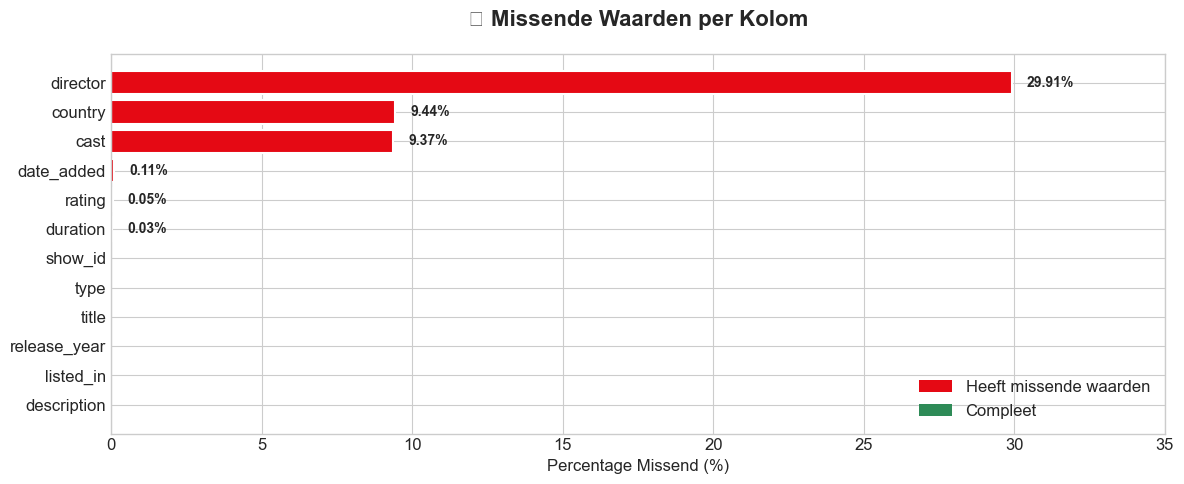


💡 Insight: Director heeft het meeste missende data (30%), gevolgd door cast en country (~10%)


In [5]:
# Missende waarden analyse - visualisatie
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Kolom': missing.index,
    'Missende Waarden': missing.values,
    'Percentage (%)': missing_pct.values
}).sort_values('Missende Waarden', ascending=False)

print("\n❓ Missende Waarden Analyse:")
print("="*50)
display(missing_df)

# Visualisatie van missende waarden
fig, ax = plt.subplots(figsize=(12, 5))

colors = [NETFLIX_RED if x > 0 else '#2E8B57' for x in missing_df['Percentage (%)']]
bars = ax.barh(missing_df['Kolom'], missing_df['Percentage (%)'], color=colors, edgecolor='white', linewidth=1.5)

# Voeg percentages toe aan bars
for bar, pct in zip(bars, missing_df['Percentage (%)']):
    width = bar.get_width()
    if pct > 0:
        ax.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{pct}%', va='center', fontsize=10, fontweight='bold')

ax.set_xlabel('Percentage Missend (%)', fontsize=12)
ax.set_title('🔍 Missende Waarden per Kolom', fontsize=16, fontweight='bold', pad=20)
ax.set_xlim(0, 35)
ax.invert_yaxis()

# Voeg legenda toe
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=NETFLIX_RED, label='Heeft missende waarden'),
                   Patch(facecolor='#2E8B57', label='Compleet')]
ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.savefig('viz_01_missing_values.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\n💡 Insight: Director heeft het meeste missende data (30%), gevolgd door cast en country (~10%)")

---
## 2. Data Cleaning

Nu gaan we de data voorbereiden voor analyse. We zullen:
- Datum kolommen converteren
- Nieuwe features extraheren
- Missende waarden behandelen waar nodig

In [6]:
# Maak een kopie voor cleaning
df_clean = df.copy()

# 1. Converteer date_added naar datetime
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'].str.strip(), format='%B %d, %Y', errors='coerce')

# 2. Extraheer jaar en maand van toevoeging
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['month_added'] = df_clean['date_added'].dt.month
df_clean['month_name'] = df_clean['date_added'].dt.month_name()

# 3. Extraheer duration numeriek
def extract_duration(duration, content_type):
    if pd.isna(duration):
        return np.nan
    if content_type == 'Movie':
        return int(duration.replace(' min', ''))
    else:  # TV Show
        return int(duration.replace(' Seasons', '').replace(' Season', ''))

df_clean['duration_num'] = df_clean.apply(lambda x: extract_duration(x['duration'], x['type']), axis=1)

# 4. Tel aantal genres per titel
df_clean['genre_count'] = df_clean['listed_in'].apply(lambda x: len(x.split(', ')))

# 5. Tel aantal landen (voor co-producties)
df_clean['country_count'] = df_clean['country'].apply(lambda x: len(x.split(', ')) if pd.notna(x) else 0)

# 6. Vul missende countries met 'Unknown'
df_clean['country_filled'] = df_clean['country'].fillna('Unknown')

# 7. Extract primary country
df_clean['primary_country'] = df_clean['country_filled'].apply(lambda x: x.split(', ')[0])

print("✅ Data Cleaning Voltooid!")
print("\n📋 Nieuwe kolommen toegevoegd:")
new_cols = ['year_added', 'month_added', 'month_name', 'duration_num', 'genre_count', 'country_count', 'primary_country']
for col in new_cols:
    print(f"   • {col}")

print(f"\n📊 Dataset shape na cleaning: {df_clean.shape}")

✅ Data Cleaning Voltooid!

📋 Nieuwe kolommen toegevoegd:
   • year_added
   • month_added
   • month_name
   • duration_num
   • genre_count
   • country_count
   • primary_country

📊 Dataset shape na cleaning: (8807, 20)


In [7]:
# Bekijk de gecleande data
df_clean[['title', 'type', 'year_added', 'month_name', 'duration_num', 'genre_count', 'primary_country']].head(10)

,title,type,year_added,month_name,duration_num,genre_count,primary_country
0,Dick Johnson Is Dead,Movie,2021.0,September,90.0,1,United States
1,Blood & Water,TV Show,2021.0,September,2.0,3,South Africa
2,Ganglands,TV Show,2021.0,September,1.0,3,Unknown
3,Jailbirds New Orleans,TV Show,2021.0,September,1.0,2,Unknown
4,Kota Factory,TV Show,2021.0,September,2.0,3,India
5,Midnight Mass,TV Show,2021.0,September,1.0,3,Unknown
6,My Little Pony: A New Generation,Movie,2021.0,September,91.0,1,Unknown
7,Sankofa,Movie,2021.0,September,125.0,3,United States
8,The Great British Baking Show,TV Show,2021.0,September,9.0,2,United Kingdom
9,The Starling,Movie,2021.0,September,104.0,2,United States


---
## 3. Het Grote Plaatje: Movies vs TV Shows

**Verhaal:** *Netflix begon als een platform voor films. Maar met de opkomst van "binge-watching" cultuur, zijn TV Shows steeds belangrijker geworden. Hoe ziet de balans er nu uit?*

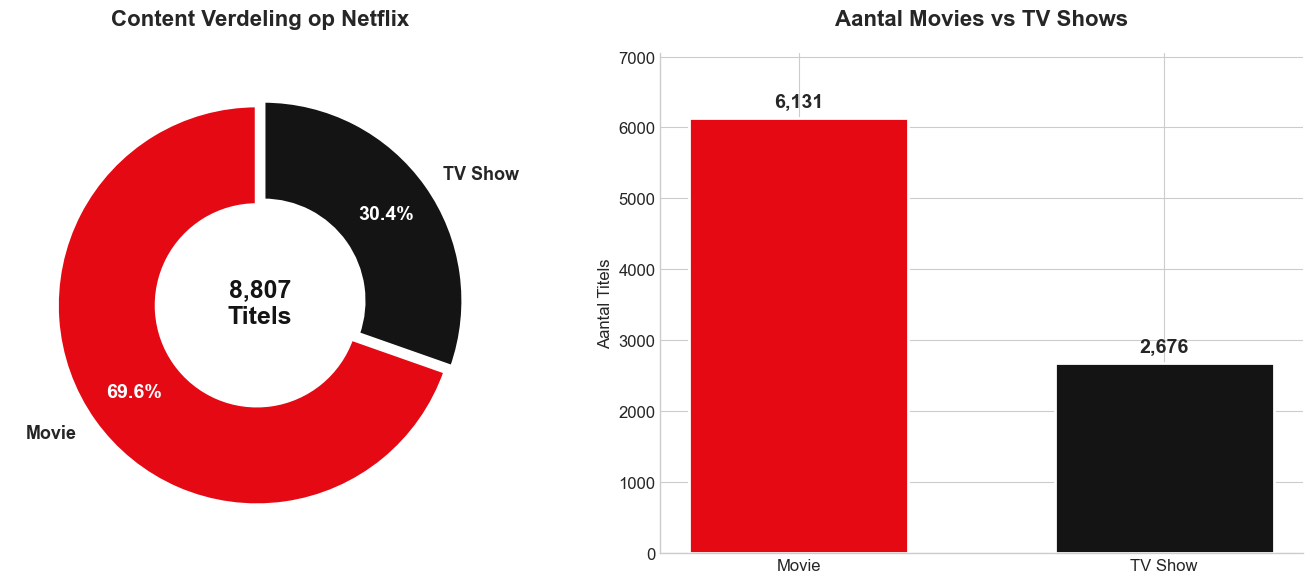


💡 KEY INSIGHT

🎬 Movies domineren de Netflix catalogus met 69.6%
📺 TV Shows maken 30.4% uit van de content

➡️  Dit vertaalt zich naar 3,455 meer films dan series!


In [8]:
# Content type verdeling
type_counts = df_clean['type'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Donut Chart
colors = [NETFLIX_RED, NETFLIX_BLACK]
explode = (0.02, 0.02)

wedges, texts, autotexts = axes[0].pie(type_counts.values, 
                                        labels=type_counts.index,
                                        autopct='%1.1f%%',
                                        colors=colors,
                                        explode=explode,
                                        startangle=90,
                                        pctdistance=0.75,
                                        wedgeprops=dict(width=0.5, edgecolor='white', linewidth=3))

# Style de percentages
for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

for text in texts:
    text.set_fontsize(13)
    text.set_fontweight('bold')

# Voeg totaal toe in het midden
axes[0].text(0, 0, f'{len(df_clean):,}\nTitels', ha='center', va='center', 
             fontsize=18, fontweight='bold', color=NETFLIX_BLACK)
axes[0].set_title('Content Verdeling op Netflix', fontsize=16, fontweight='bold', pad=20)

# Subplot 2: Bar Chart met aantallen
bars = axes[1].bar(type_counts.index, type_counts.values, color=colors, 
                   edgecolor='white', linewidth=2, width=0.6)

# Voeg waarden toe boven de bars
for bar, count in zip(bars, type_counts.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
                 f'{count:,}', ha='center', va='bottom', fontsize=14, fontweight='bold')

axes[1].set_ylabel('Aantal Titels', fontsize=12)
axes[1].set_title('Aantal Movies vs TV Shows', fontsize=16, fontweight='bold', pad=20)
axes[1].set_ylim(0, max(type_counts.values) * 1.15)

# Verwijder onnodige spines
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('viz_02_content_distribution.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

# Key insight
movie_pct = type_counts['Movie'] / len(df_clean) * 100
tv_pct = type_counts['TV Show'] / len(df_clean) * 100

print("\n" + "="*60)
print("💡 KEY INSIGHT")
print("="*60)
print(f"\n🎬 Movies domineren de Netflix catalogus met {movie_pct:.1f}%")
print(f"📺 TV Shows maken {tv_pct:.1f}% uit van de content")
print(f"\n➡️  Dit vertaalt zich naar {type_counts['Movie'] - type_counts['TV Show']:,} meer films dan series!")

---
## 4. De Groei van Netflix: Een Tijdlijn

**Verhaal:** *Netflix's reis van startup naar streaming gigant. Wanneer begon de explosieve groei? En hoe is de content strategie veranderd over de jaren?*

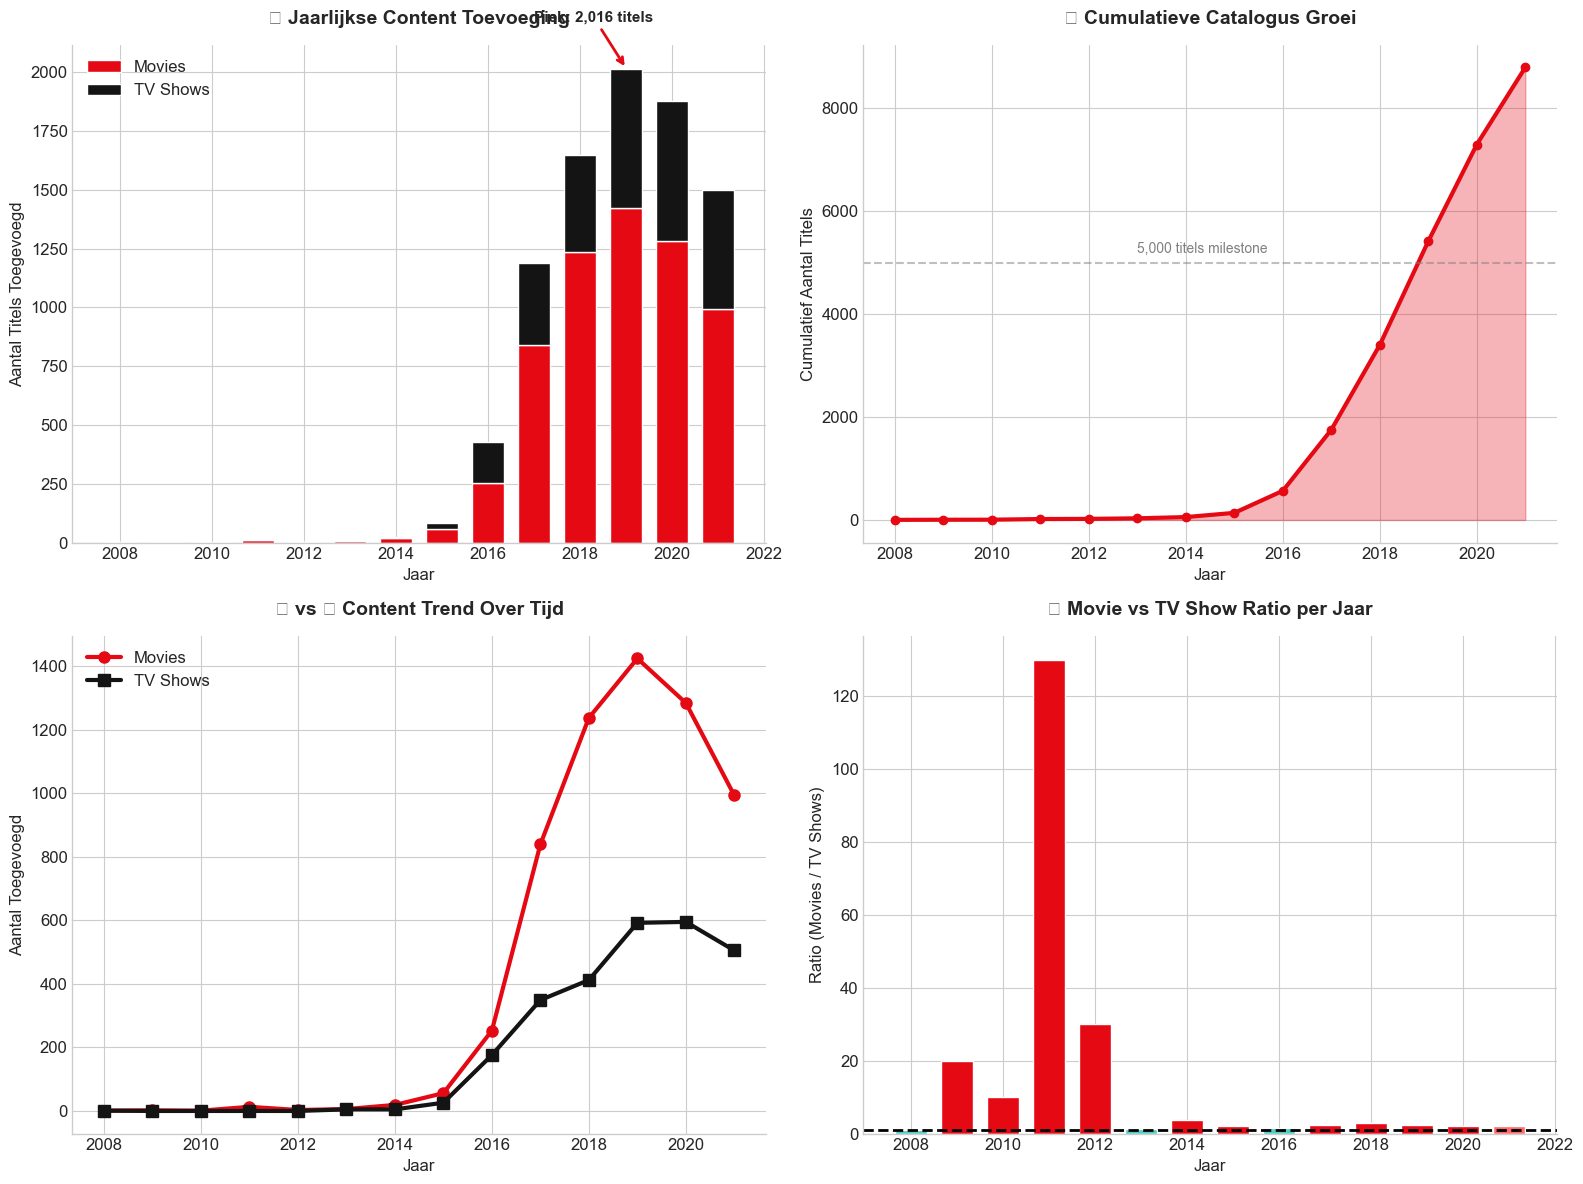


💡 KEY INSIGHTS: De Groei van Netflix

📅 Data beschikbaar van 2008 tot 2021

🏆 Piekjaar: 2019 met 2,016 nieuwe titels

📈 Totale groei: van 2 titels in 2008 naar
   8,797 titels cumulatief in 2021

🔄 De Movie/TV ratio is gedaald van 20.0 naar 2.0
   ➡️ Netflix investeert steeds meer in TV Shows!


In [9]:
# Filter data met geldige jaar_added
df_timeline = df_clean[df_clean['year_added'].notna()].copy()

# Groepeer per jaar en type
yearly_content = df_timeline.groupby(['year_added', 'type']).size().unstack(fill_value=0)
yearly_content['Total'] = yearly_content.sum(axis=1)

# Cumulatieve groei
yearly_content['Cumulative_Movies'] = yearly_content['Movie'].cumsum()
yearly_content['Cumulative_TV'] = yearly_content['TV Show'].cumsum()
yearly_content['Cumulative_Total'] = yearly_content['Total'].cumsum()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# ===== Plot 1: Yearly Content Added (Stacked Bar) =====
ax1 = axes[0, 0]
years = yearly_content.index.astype(int)
width = 0.7

bars1 = ax1.bar(years, yearly_content['Movie'], width, label='Movies', color=NETFLIX_RED, edgecolor='white')
bars2 = ax1.bar(years, yearly_content['TV Show'], width, bottom=yearly_content['Movie'], 
                label='TV Shows', color=NETFLIX_BLACK, edgecolor='white')

ax1.set_xlabel('Jaar', fontsize=12)
ax1.set_ylabel('Aantal Titels Toegevoegd', fontsize=12)
ax1.set_title('📈 Jaarlijkse Content Toevoeging', fontsize=14, fontweight='bold', pad=15)
ax1.legend(loc='upper left')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Annotatie voor piekjaar
peak_year = yearly_content['Total'].idxmax()
peak_value = yearly_content['Total'].max()
ax1.annotate(f'Piek: {int(peak_value):,} titels', 
             xy=(peak_year, peak_value), 
             xytext=(peak_year-2, peak_value+200),
             fontsize=11, fontweight='bold',
             arrowprops=dict(arrowstyle='->', color=NETFLIX_RED, lw=2))

# ===== Plot 2: Cumulatieve Groei =====
ax2 = axes[0, 1]
ax2.fill_between(years, yearly_content['Cumulative_Total'], alpha=0.3, color=NETFLIX_RED)
ax2.plot(years, yearly_content['Cumulative_Total'], color=NETFLIX_RED, linewidth=3, marker='o', markersize=6)

ax2.set_xlabel('Jaar', fontsize=12)
ax2.set_ylabel('Cumulatief Aantal Titels', fontsize=12)
ax2.set_title('🚀 Cumulatieve Catalogus Groei', fontsize=14, fontweight='bold', pad=15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Voeg milestone markers toe
ax2.axhline(y=5000, color='gray', linestyle='--', alpha=0.5)
ax2.text(2013, 5200, '5,000 titels milestone', fontsize=10, color='gray')

# ===== Plot 3: Movies vs TV Shows Over Time =====
ax3 = axes[1, 0]
ax3.plot(years, yearly_content['Movie'], color=NETFLIX_RED, linewidth=3, marker='o', 
         markersize=8, label='Movies')
ax3.plot(years, yearly_content['TV Show'], color=NETFLIX_BLACK, linewidth=3, marker='s', 
         markersize=8, label='TV Shows')

ax3.set_xlabel('Jaar', fontsize=12)
ax3.set_ylabel('Aantal Toegevoegd', fontsize=12)
ax3.set_title('🎬 vs 📺 Content Trend Over Tijd', fontsize=14, fontweight='bold', pad=15)
ax3.legend(loc='upper left')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# ===== Plot 4: Ratio Movies/TV Shows Over Time =====
ax4 = axes[1, 1]
ratio = yearly_content['Movie'] / (yearly_content['TV Show'] + 0.1)  # Avoid division by zero

colors_ratio = [NETFLIX_RED if r > 2 else '#FF6B6B' if r > 1.5 else '#4ECDC4' for r in ratio]
bars = ax4.bar(years, ratio, color=colors_ratio, edgecolor='white', width=0.7)

ax4.axhline(y=1, color='black', linestyle='--', linewidth=2, label='Gelijke verdeling')
ax4.set_xlabel('Jaar', fontsize=12)
ax4.set_ylabel('Ratio (Movies / TV Shows)', fontsize=12)
ax4.set_title('📊 Movie vs TV Show Ratio per Jaar', fontsize=14, fontweight='bold', pad=15)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('viz_03_timeline_growth.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

# Key insights
print("\n" + "="*70)
print("💡 KEY INSIGHTS: De Groei van Netflix")
print("="*70)
print(f"\n📅 Data beschikbaar van {int(yearly_content.index.min())} tot {int(yearly_content.index.max())}")
print(f"\n🏆 Piekjaar: {int(peak_year)} met {int(peak_value):,} nieuwe titels")
print(f"\n📈 Totale groei: van {int(yearly_content['Total'].iloc[0])} titels in {int(years[0])} naar")
print(f"   {int(yearly_content['Cumulative_Total'].iloc[-1]):,} titels cumulatief in {int(years[-1])}")
print(f"\n🔄 De Movie/TV ratio is gedaald van {ratio.iloc[1]:.1f} naar {ratio.iloc[-1]:.1f}")
print(f"   ➡️ Netflix investeert steeds meer in TV Shows!")

In [10]:
# Interactieve versie met Plotly
fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Scatter(
        x=years, 
        y=yearly_content['Cumulative_Total'],
        mode='lines+markers',
        name='Cumulatief Totaal',
        line=dict(color=NETFLIX_RED, width=4),
        marker=dict(size=10),
        fill='tozeroy',
        fillcolor='rgba(229, 9, 20, 0.2)',
        hovertemplate='<b>%{x}</b><br>Totaal: %{y:,} titels<extra></extra>'
    )
)

fig.update_layout(
    title=dict(
        text='<b>🚀 Netflix Catalogus Groei Over de Jaren</b>',
        font=dict(size=20)
    ),
    xaxis_title='Jaar',
    yaxis_title='Cumulatief Aantal Titels',
    template='plotly_white',
    hovermode='x unified',
    height=500
)

fig.show()

---
## 5. Geografische Spreiding: Wie Maakt de Content?

**Verhaal:** *Netflix is wereldwijd, maar waar komt de content vandaan? Is het nog steeds gedomineerd door Hollywood, of zien we een shift naar internationale content?*

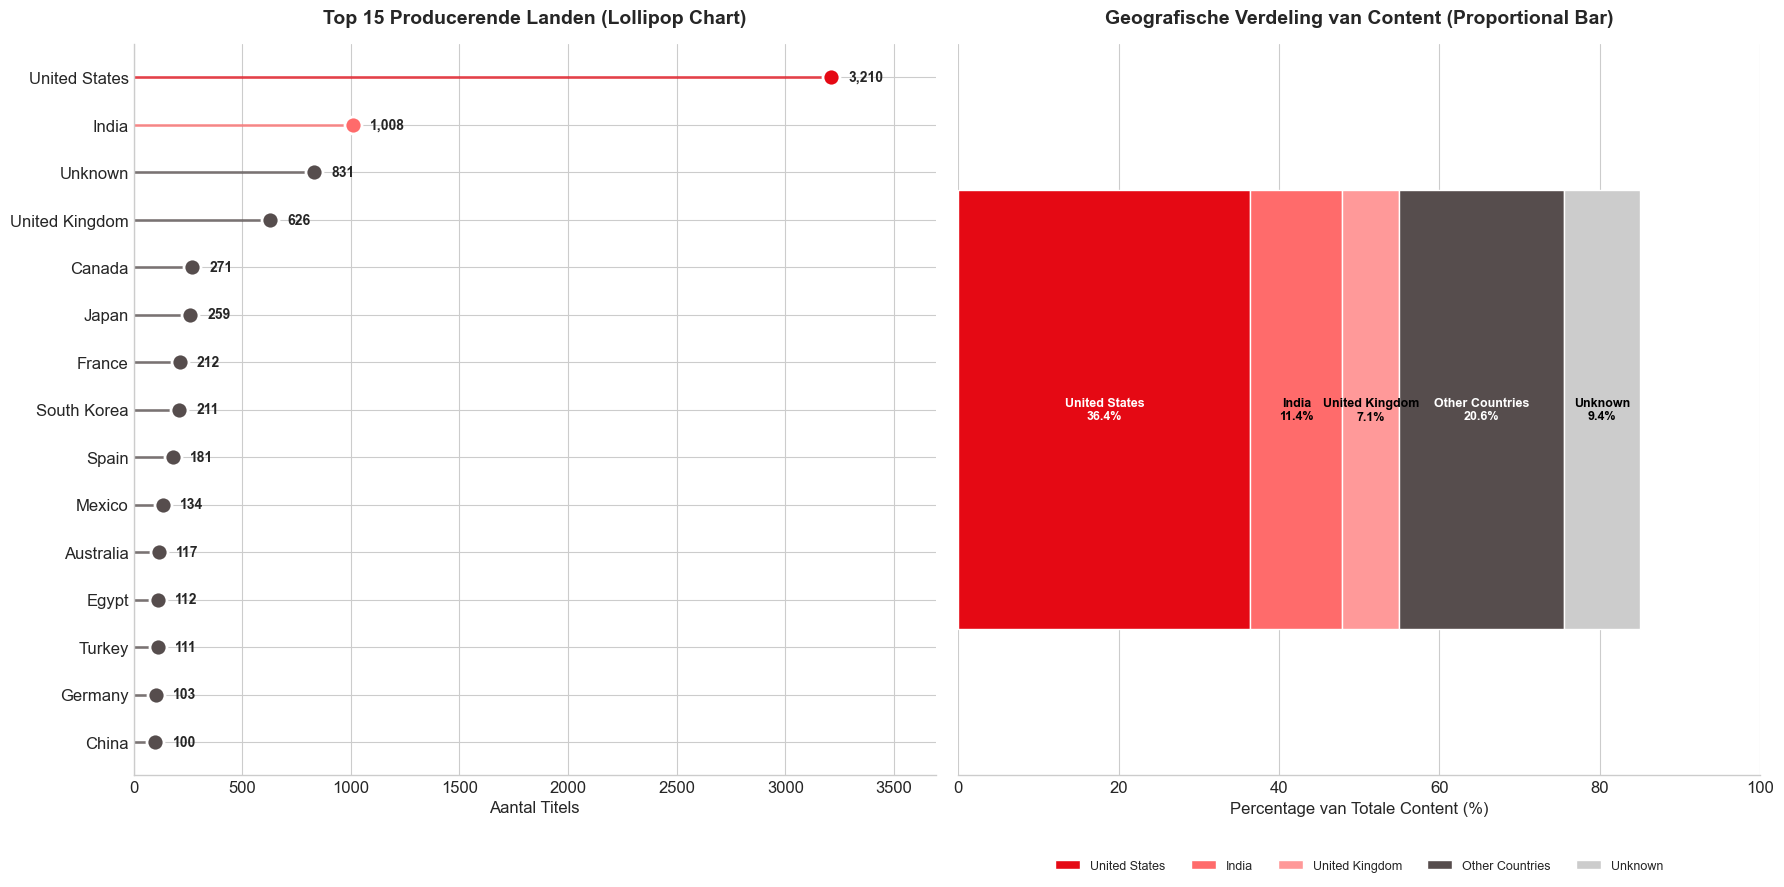


KEY INSIGHTS: Geografische Verdeling
Verenigde Staten domineert met 3,210 titels (36.4%)
India is de #2 met 1,008 titels (11.4%)
Content komt uit 90 verschillende landen


In [11]:
# Top 15 landen - Verbeterde Visualisatie
top_countries = df_clean['primary_country'].value_counts().head(15)

fig, axes = plt.subplots(1, 2, figsize=(18, 9))

# ===== Plot 1: Lollipop Chart (beter dan bar chart) =====
ax1 = axes[0]
y_positions = range(len(top_countries))
countries = top_countries.index[::-1]
values = top_countries.values[::-1]

# Lollipop stems
for i, (country, val) in enumerate(zip(countries, values)):
    color = NETFLIX_RED if country == 'United States' else '#FF6B6B' if country == 'India' else NETFLIX_GRAY
    ax1.hlines(y=i, xmin=0, xmax=val, color=color, linewidth=2, alpha=0.7)
    ax1.scatter(val, i, color=color, s=150, zorder=5, edgecolor='white', linewidth=2)
    ax1.text(val + 80, i, f'{val:,}', va='center', fontsize=10, fontweight='bold')

ax1.set_yticks(list(y_positions))
ax1.set_yticklabels(countries)
ax1.set_xlabel('Aantal Titels', fontsize=12)
ax1.set_title('Top 15 Producerende Landen (Lollipop Chart)', fontsize=14, fontweight='bold', pad=15)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlim(0, max(values) * 1.15)

# ===== Plot 2: Proportional Stacked Bar (beter dan pie chart) =====
ax2 = axes[1]

# Calculate percentages for top regions
total = len(df_clean)
us_count = top_countries.get('United States', 0)
india_count = top_countries.get('India', 0)
uk_count = top_countries.get('United Kingdom', 0)
other_known = sum(v for k, v in top_countries.items() if k not in ['United States', 'India', 'United Kingdom', 'Unknown'])
unknown_count = top_countries.get('Unknown', 0)

# Data for proportional bar
regions = ['United States', 'India', 'United Kingdom', 'Other Countries', 'Unknown']
counts = [us_count, india_count, uk_count, other_known, unknown_count]
colors_region = [NETFLIX_RED, '#FF6B6B', '#FF9999', NETFLIX_GRAY, '#CCCCCC']

# Create a horizontal stacked bar (proportional)
left = 0
for region, count, color in zip(regions, counts, colors_region):
    pct = count / total * 100
    ax2.barh(0, pct, left=left, color=color, edgecolor='white', height=0.6, label=region)
    if pct > 5:
        text_color = 'white' if color in [NETFLIX_RED, NETFLIX_GRAY] else 'black'
        label_text = region + chr(10) + f'{pct:.1f}%'
        ax2.text(left + pct/2, 0, label_text, ha='center', va='center', fontsize=9, fontweight='bold', color=text_color)
    left += pct

ax2.set_xlim(0, 100)
ax2.set_ylim(-0.5, 0.5)
ax2.set_xlabel('Percentage van Totale Content (%)', fontsize=12)
ax2.set_title('Geografische Verdeling van Content (Proportional Bar)', fontsize=14, fontweight='bold', pad=15)
ax2.set_yticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Add small legend below
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5, fontsize=9)

plt.tight_layout()
plt.savefig('viz_04_geographical_distribution.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

# Key insights
us_pct = top_countries['United States'] / len(df_clean) * 100
india_pct = top_countries['India'] / len(df_clean) * 100

print()
print('='*70)
print('KEY INSIGHTS: Geografische Verdeling')
print('='*70)
print(f'Verenigde Staten domineert met {top_countries["United States"]:,} titels ({us_pct:.1f}%)')
print(f'India is de #2 met {top_countries["India"]:,} titels ({india_pct:.1f}%)')
print(f'Content komt uit {df_clean["primary_country"].nunique()} verschillende landen')

In [12]:
# Interactieve World Map met Plotly
country_counts = df_clean['primary_country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']
country_counts = country_counts[country_counts['country'] != 'Unknown']

fig = px.choropleth(
    country_counts,
    locations='country',
    locationmode='country names',
    color='count',
    hover_name='country',
    color_continuous_scale=['#FFE5E5', '#FF9999', '#FF6666', '#FF3333', NETFLIX_RED, '#990000'],
    title='<b>🗺️ Netflix Content per Land</b>',
    labels={'count': 'Aantal Titels'}
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    height=600,
    title_font_size=20
)

fig.show()

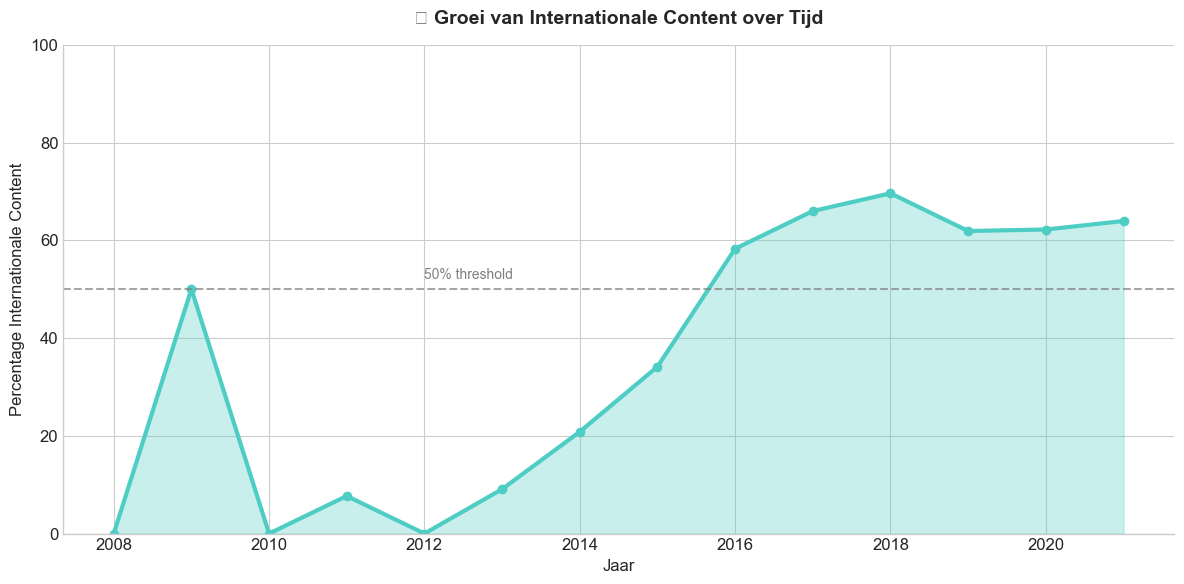


💡 Internationale content is gegroeid van 50.0% naar 64.0%!


In [13]:
# Analyse: Hoe is de internationale content gegroeid over tijd?
df_geo_time = df_timeline.copy()
df_geo_time['is_us'] = df_geo_time['primary_country'] == 'United States'

geo_over_time = df_geo_time.groupby(['year_added', 'is_us']).size().unstack(fill_value=0)
geo_over_time.columns = ['International', 'United States']
geo_over_time['International_pct'] = geo_over_time['International'] / (geo_over_time['International'] + geo_over_time['United States']) * 100

fig, ax = plt.subplots(figsize=(12, 6))

ax.fill_between(geo_over_time.index, geo_over_time['International_pct'], alpha=0.3, color='#4ECDC4')
ax.plot(geo_over_time.index, geo_over_time['International_pct'], color='#4ECDC4', linewidth=3, marker='o')

ax.axhline(y=50, color='gray', linestyle='--', alpha=0.7)
ax.text(2012, 52, '50% threshold', fontsize=10, color='gray')

ax.set_xlabel('Jaar', fontsize=12)
ax.set_ylabel('Percentage Internationale Content', fontsize=12)
ax.set_title('🌍 Groei van Internationale Content over Tijd', fontsize=14, fontweight='bold', pad=15)
ax.set_ylim(0, 100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('viz_05_international_growth.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print(f"\n💡 Internationale content is gegroeid van {geo_over_time['International_pct'].iloc[1]:.1f}% naar {geo_over_time['International_pct'].iloc[-1]:.1f}%!")

---
## 6. Genre Analyse: Wat Kijkt de Wereld?

**Verhaal:** *Welke genres domineren Netflix? En hoe verschillen de voorkeuren voor Movies versus TV Shows?*

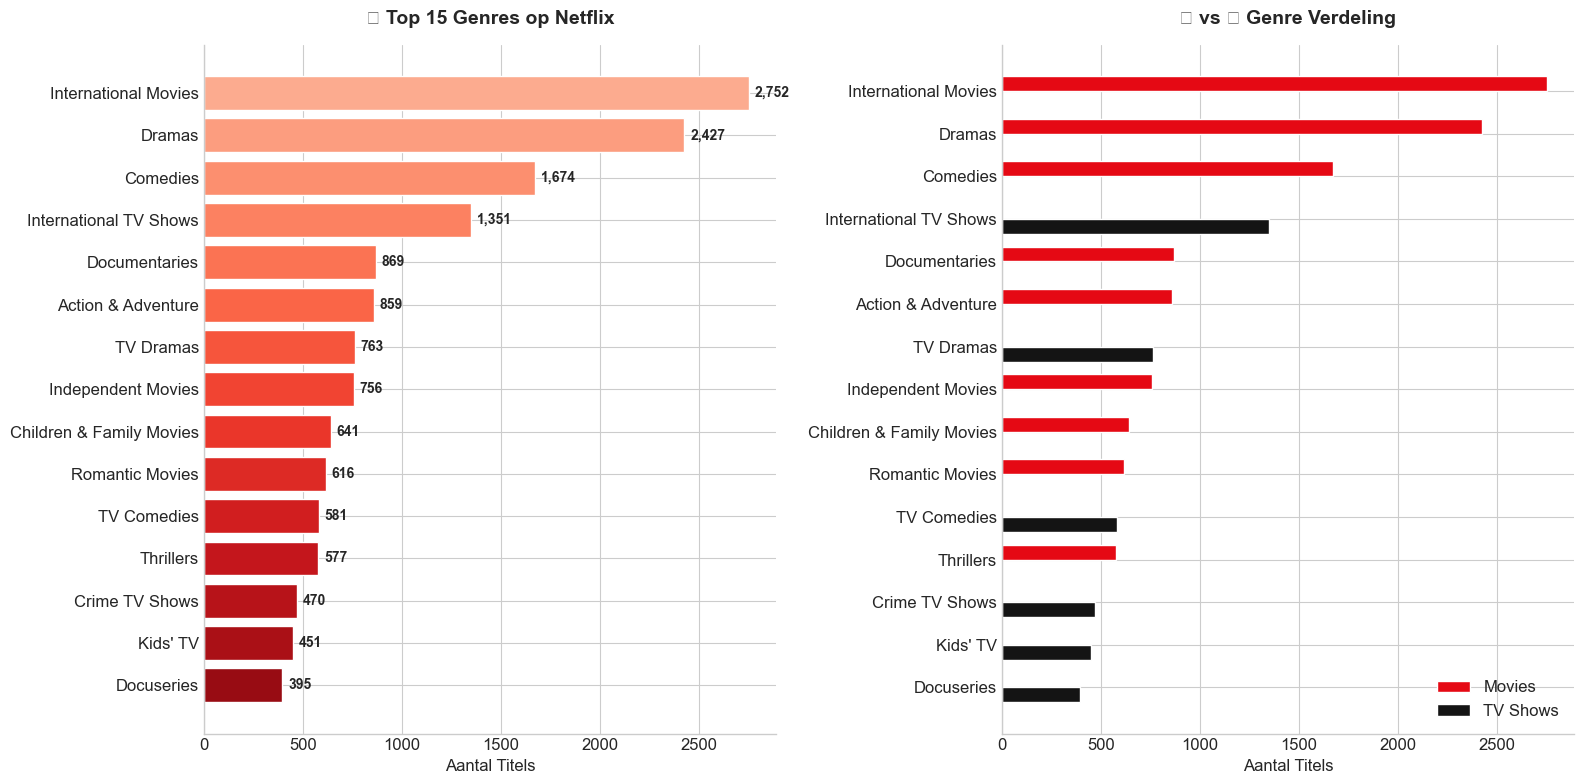


💡 KEY INSIGHTS: Genre Analyse

🥇 Top genre: International Movies met 2,752 titels
🥈 #2: Dramas met 2,427 titels
🥉 #3: Comedies met 1,674 titels

📊 Totaal unieke genres: 42


In [14]:
# Explode genres (een titel kan meerdere genres hebben)
all_genres = []
for idx, row in df_clean.iterrows():
    genres = row['listed_in'].split(', ')
    for genre in genres:
        all_genres.append({'genre': genre.strip(), 'type': row['type']})

genre_df = pd.DataFrame(all_genres)

# Top 15 genres overall
top_genres = genre_df['genre'].value_counts().head(15)

# Genres by content type
genre_by_type = genre_df.groupby(['genre', 'type']).size().unstack(fill_value=0)
genre_by_type = genre_by_type.loc[top_genres.index]

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# ===== Plot 1: Top 15 Genres Bar Chart =====
ax1 = axes[0]
colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(top_genres)))[::-1]
bars = ax1.barh(top_genres.index[::-1], top_genres.values[::-1], color=colors, edgecolor='white')

for bar, count in zip(bars, top_genres.values[::-1]):
    ax1.text(count + 30, bar.get_y() + bar.get_height()/2, f'{count:,}', 
             va='center', fontsize=10, fontweight='bold')

ax1.set_xlabel('Aantal Titels', fontsize=12)
ax1.set_title('🎭 Top 15 Genres op Netflix', fontsize=14, fontweight='bold', pad=15)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# ===== Plot 2: Genre verdeling Movies vs TV Shows =====
ax2 = axes[1]
x = np.arange(len(genre_by_type))
width = 0.35

bars1 = ax2.barh(x - width/2, genre_by_type['Movie'], width, label='Movies', color=NETFLIX_RED, edgecolor='white')
bars2 = ax2.barh(x + width/2, genre_by_type['TV Show'], width, label='TV Shows', color=NETFLIX_BLACK, edgecolor='white')

ax2.set_yticks(x)
ax2.set_yticklabels(genre_by_type.index)
ax2.set_xlabel('Aantal Titels', fontsize=12)
ax2.set_title('🎬 vs 📺 Genre Verdeling', fontsize=14, fontweight='bold', pad=15)
ax2.legend(loc='lower right')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.invert_yaxis()

plt.tight_layout()
plt.savefig('viz_06_genre_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

# Key insights
print("\n" + "="*70)
print("💡 KEY INSIGHTS: Genre Analyse")
print("="*70)
print(f"\n🥇 Top genre: {top_genres.index[0]} met {top_genres.values[0]:,} titels")
print(f"🥈 #2: {top_genres.index[1]} met {top_genres.values[1]:,} titels")
print(f"🥉 #3: {top_genres.index[2]} met {top_genres.values[2]:,} titels")
print(f"\n📊 Totaal unieke genres: {genre_df['genre'].nunique()}")

---
## Unieke Data Storytelling Visualisaties

De volgende visualisaties zijn speciaal ontworpen voor **data storytelling** - ze vertellen een verhaal en zijn visueel interessant.

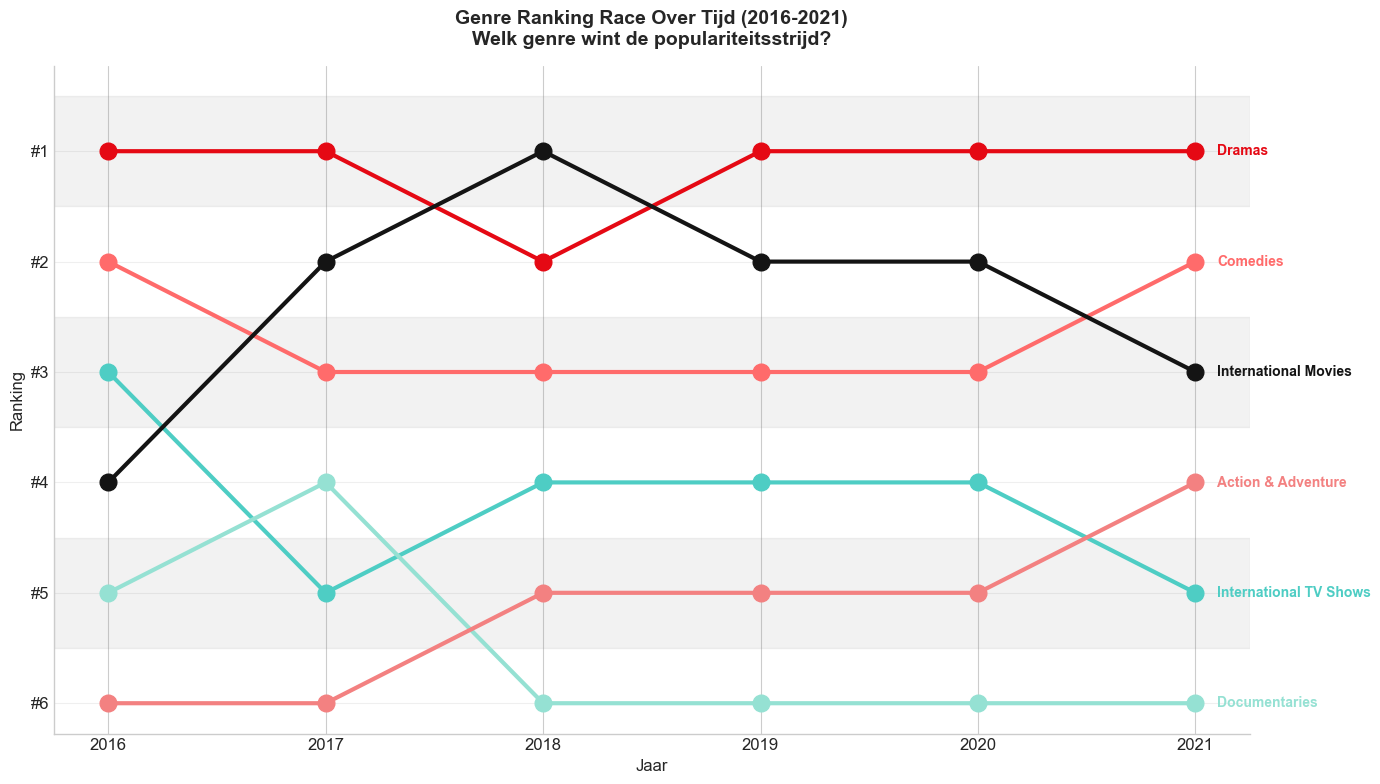

INSIGHT: International Movies blijft dominant, maar International TV Shows stijgt snel!


In [15]:
# ============================================
# BUMP CHART: Genre Rankings Over Tijd
# ============================================
# Een bump chart toont hoe rankings veranderen over tijd - perfect voor storytelling!

# Bereken genre populariteit per jaar
df_clean['year_added'] = pd.to_datetime(df_clean['date_added'], errors='coerce').dt.year
df_yearly = df_clean[df_clean['year_added'] >= 2016].copy()

# Top 6 genres voor leesbaarheid
top_6_genres = ['International Movies', 'Dramas', 'Comedies', 'International TV Shows', 'Documentaries', 'Action & Adventure']

# Bereken ranking per jaar
rankings = {}
for year in sorted(df_yearly['year_added'].dropna().unique()):
    year_data = df_yearly[df_yearly['year_added'] == year]
    genre_counts = {}
    for genre in top_6_genres:
        genre_counts[genre] = year_data['listed_in'].str.contains(genre, na=False).sum()

    # Sorteer en krijg rankings
    sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
    for rank, (genre, _) in enumerate(sorted_genres, 1):
        if genre not in rankings:
            rankings[genre] = {}
        rankings[genre][int(year)] = rank

# Plot Bump Chart
fig, ax = plt.subplots(figsize=(14, 8))

colors_bump = [NETFLIX_RED, '#FF6B6B', '#4ECDC4', NETFLIX_BLACK, '#95E1D3', '#F38181']
years = sorted([int(y) for y in df_yearly['year_added'].dropna().unique()])

for i, (genre, year_ranks) in enumerate(rankings.items()):
    ranks = [year_ranks.get(y, None) for y in years]
    valid_years = [y for y, r in zip(years, ranks) if r is not None]
    valid_ranks = [r for r in ranks if r is not None]

    ax.plot(valid_years, valid_ranks, marker='o', markersize=12, linewidth=3,
            color=colors_bump[i], label=genre, zorder=3)

    # Label aan het einde
    if valid_ranks:
        ax.text(valid_years[-1] + 0.1, valid_ranks[-1], genre,
                fontsize=10, va='center', color=colors_bump[i], fontweight='bold')

ax.set_yticks(range(1, 7))
ax.set_yticklabels(['#1', '#2', '#3', '#4', '#5', '#6'])
ax.set_xticks(years)
ax.invert_yaxis()  # #1 bovenaan
ax.set_xlabel('Jaar', fontsize=12)
ax.set_ylabel('Ranking', fontsize=12)
ax.set_title('Genre Ranking Race Over Tijd (2016-2021)\nWelk genre wint de populariteitsstrijd?',
             fontsize=14, fontweight='bold', pad=15)
ax.grid(True, alpha=0.3, axis='y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Achtergrond banden
for i in range(1, 7, 2):
    ax.axhspan(i-0.5, i+0.5, alpha=0.1, color='gray')

plt.tight_layout()
plt.savefig('viz_storytelling_01_bump_chart.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print('INSIGHT: International Movies blijft dominant, maar International TV Shows stijgt snel!')

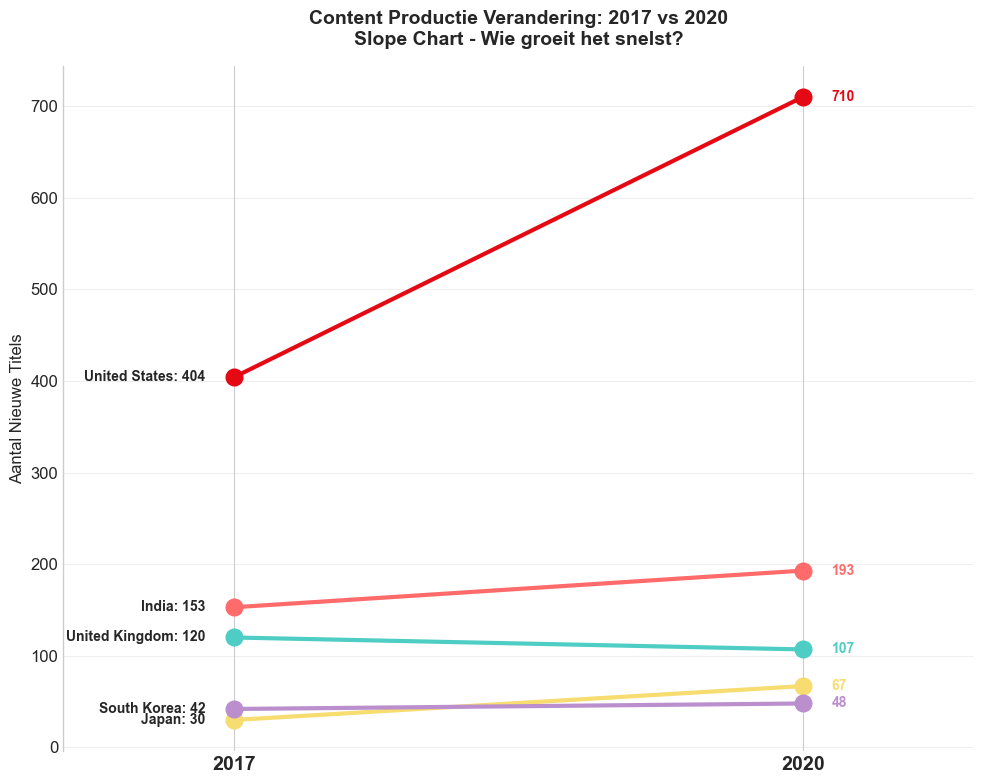

INSIGHT: India toont explosieve groei - van bescheiden productie naar grote speler!


In [16]:
# ============================================
# SLOPE CHART: Voor-na Vergelijking
# ============================================
# Perfect voor het tonen van verandering tussen twee momenten

# Vergelijk 2017 vs 2020
year1, year2 = 2017, 2020

# Top landen content productie
countries_to_compare = ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea']

data_year1 = df_yearly[df_yearly['year_added'] == year1]
data_year2 = df_yearly[df_yearly['year_added'] == year2]

fig, ax = plt.subplots(figsize=(10, 8))

slope_colors = [NETFLIX_RED, '#FF6B6B', '#4ECDC4', '#F7DC6F', '#BB8FCE']

for i, country in enumerate(countries_to_compare):
    count1 = len(data_year1[data_year1['primary_country'] == country])
    count2 = len(data_year2[data_year2['primary_country'] == country])

    # Lijn tussen de twee punten
    ax.plot([0, 1], [count1, count2], color=slope_colors[i], linewidth=3, marker='o', markersize=12)

    # Labels
    ax.text(-0.05, count1, f'{country}: {count1}', ha='right', va='center', fontsize=10, fontweight='bold')
    ax.text(1.05, count2, f'{count2}', ha='left', va='center', fontsize=10, fontweight='bold', color=slope_colors[i])

ax.set_xlim(-0.3, 1.3)
ax.set_xticks([0, 1])
ax.set_xticklabels([str(year1), str(year2)], fontsize=14, fontweight='bold')
ax.set_ylabel('Aantal Nieuwe Titels', fontsize=12)
ax.set_title(f'Content Productie Verandering: {year1} vs {year2}\nSlope Chart - Wie groeit het snelst?',
             fontsize=14, fontweight='bold', pad=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('viz_storytelling_02_slope_chart.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print('INSIGHT: India toont explosieve groei - van bescheiden productie naar grote speler!')

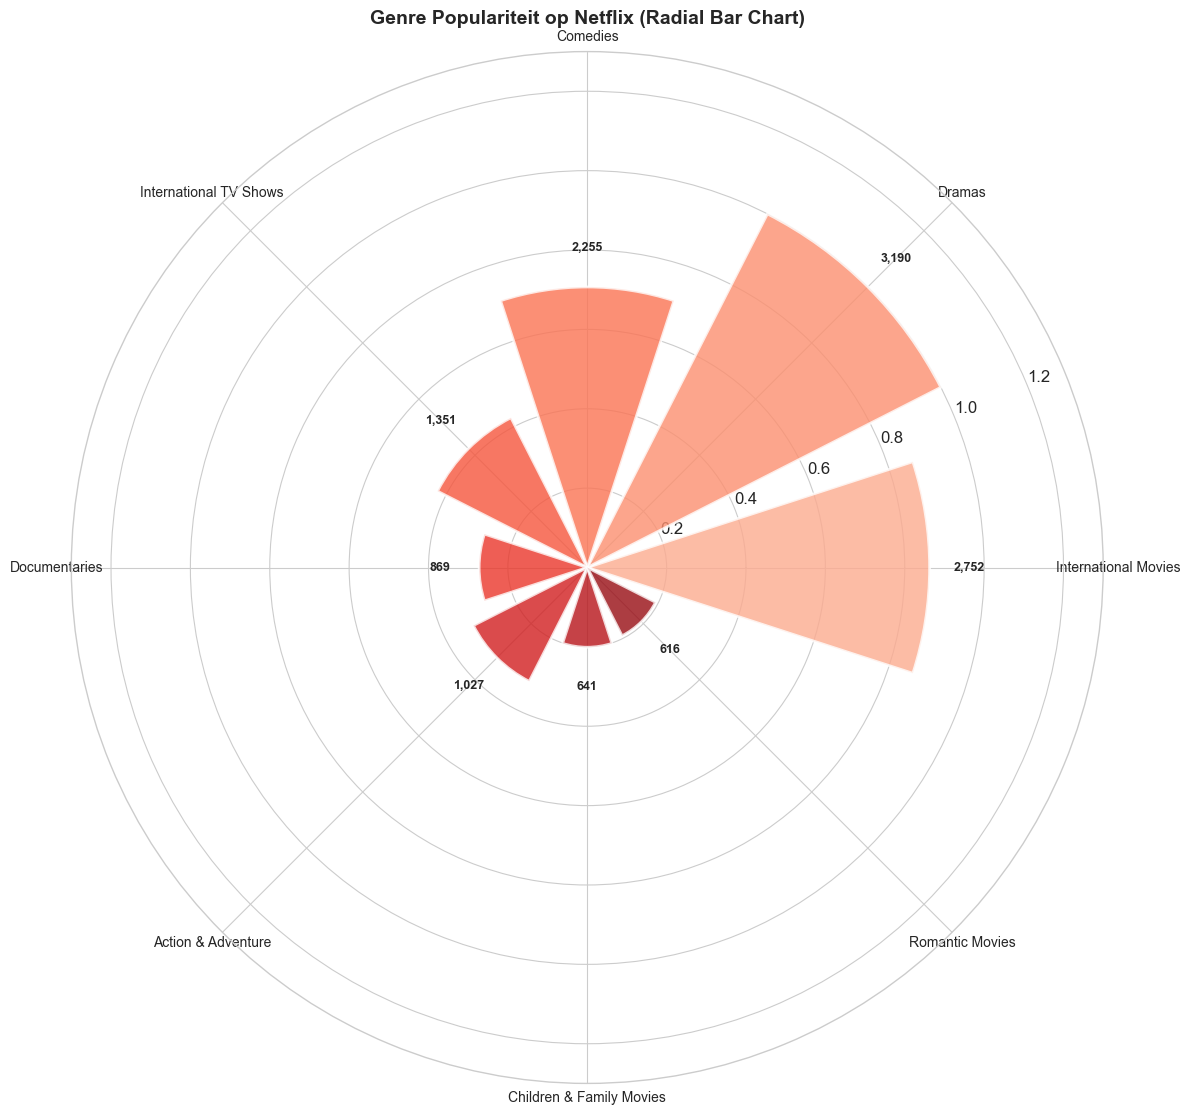

INSIGHT: International Movies domineert duidelijk het aanbod!


In [17]:
# ============================================
# RADIAL BAR CHART: Genre Distributie
# ============================================
# Een visueel aantrekkelijk alternatief voor bar charts

# Top 8 genres
genre_list = ['International Movies', 'Dramas', 'Comedies', 'International TV Shows',
              'Documentaries', 'Action & Adventure', 'Children & Family Movies', 'Romantic Movies']

genre_counts_radial = []
for genre in genre_list:
    count = df_clean['listed_in'].str.contains(genre, na=False).sum()
    genre_counts_radial.append(count)

# Normaliseer voor radial chart
max_count = max(genre_counts_radial)
normalized = [c/max_count for c in genre_counts_radial]

# Create radial bar chart
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

# Aantal categorien
N = len(genre_list)
theta = np.linspace(0, 2*np.pi, N, endpoint=False)
width = 2*np.pi / N * 0.8

# Kleuren gradient
colors_radial = plt.cm.Reds(np.linspace(0.3, 0.9, N))

bars = ax.bar(theta, normalized, width=width, color=colors_radial, edgecolor='white', linewidth=2, alpha=0.8)

# Labels
ax.set_xticks(theta)
ax.set_xticklabels(genre_list, fontsize=10)

# Voeg waarden toe
for angle, val, count in zip(theta, normalized, genre_counts_radial):
    ax.text(angle, val + 0.1, f'{count:,}', ha='center', va='center', fontsize=9, fontweight='bold')

ax.set_ylim(0, 1.3)
ax.set_title('Genre Populariteit op Netflix (Radial Bar Chart)', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('viz_storytelling_03_radial_bar.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print('INSIGHT: International Movies domineert duidelijk het aanbod!')

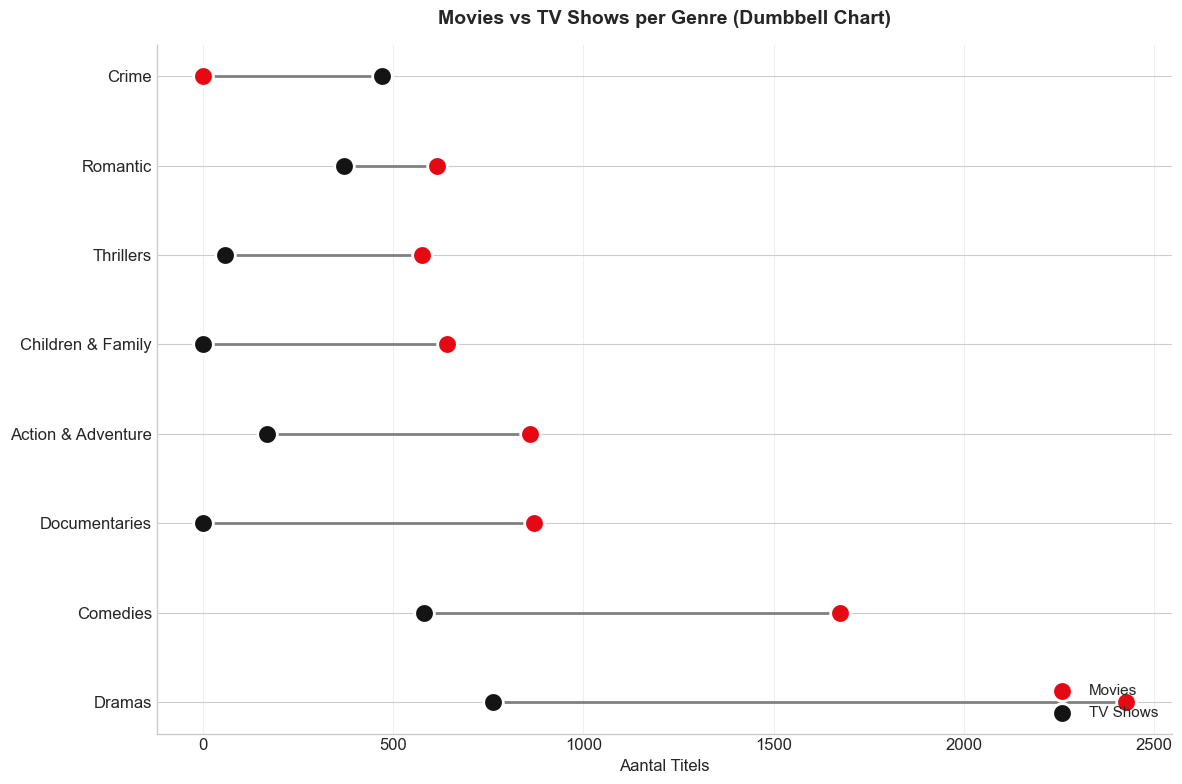

INSIGHT: Bij elke genre domineren Movies - behalve Crime waar TV Shows sterker zijn!


In [18]:
# ============================================
# DUMBBELL CHART: Movies vs TV Shows per Genre
# ============================================
# Perfect voor het vergelijken van twee groepen

# Genres die zowel voor movies als TV shows relevant zijn
compare_genres = ['Dramas', 'Comedies', 'Documentaries', 'Action & Adventure',
                  'Children & Family', 'Thrillers', 'Romantic', 'Crime']

movies = df_clean[df_clean['type'] == 'Movie']
tv_shows = df_clean[df_clean['type'] == 'TV Show']

movie_counts = []
tv_counts = []
for genre in compare_genres:
    movie_counts.append(movies['listed_in'].str.contains(genre, na=False).sum())
    tv_counts.append(tv_shows['listed_in'].str.contains(genre, na=False).sum())

fig, ax = plt.subplots(figsize=(12, 8))

y_pos = range(len(compare_genres))

# Dumbbell lines
for i, (m, t) in enumerate(zip(movie_counts, tv_counts)):
    ax.plot([m, t], [i, i], color='gray', linewidth=2, zorder=1)

# Movie dots
ax.scatter(movie_counts, y_pos, color=NETFLIX_RED, s=200, label='Movies', zorder=2, edgecolor='white', linewidth=2)

# TV Show dots
ax.scatter(tv_counts, y_pos, color=NETFLIX_BLACK, s=200, label='TV Shows', zorder=2, edgecolor='white', linewidth=2)

# Labels
ax.set_yticks(y_pos)
ax.set_yticklabels(compare_genres)
ax.set_xlabel('Aantal Titels', fontsize=12)
ax.set_title('Movies vs TV Shows per Genre (Dumbbell Chart)', fontsize=14, fontweight='bold', pad=15)
ax.legend(loc='lower right', fontsize=11)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('viz_storytelling_04_dumbbell.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print('INSIGHT: Bij elke genre domineren Movies - behalve Crime waar TV Shows sterker zijn!')

In [19]:
# Interactieve Treemap van Genres
genre_counts = genre_df['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

fig = px.treemap(
    genre_counts.head(20),
    path=['genre'],
    values='count',
    color='count',
    color_continuous_scale=['#FFE5E5', '#FF9999', '#FF3333', NETFLIX_RED, '#990000'],
    title='<b>🎭 Netflix Genre Treemap - Top 20</b>'
)

fig.update_layout(
    height=600,
    title_font_size=20
)

fig.show()

---
## 7. Content Ratings: Voor Wie is Netflix?

**Verhaal:** *Is Netflix vooral voor volwassenen, of is er genoeg content voor alle leeftijden? Hoe verschilt dit tussen Movies en TV Shows?*

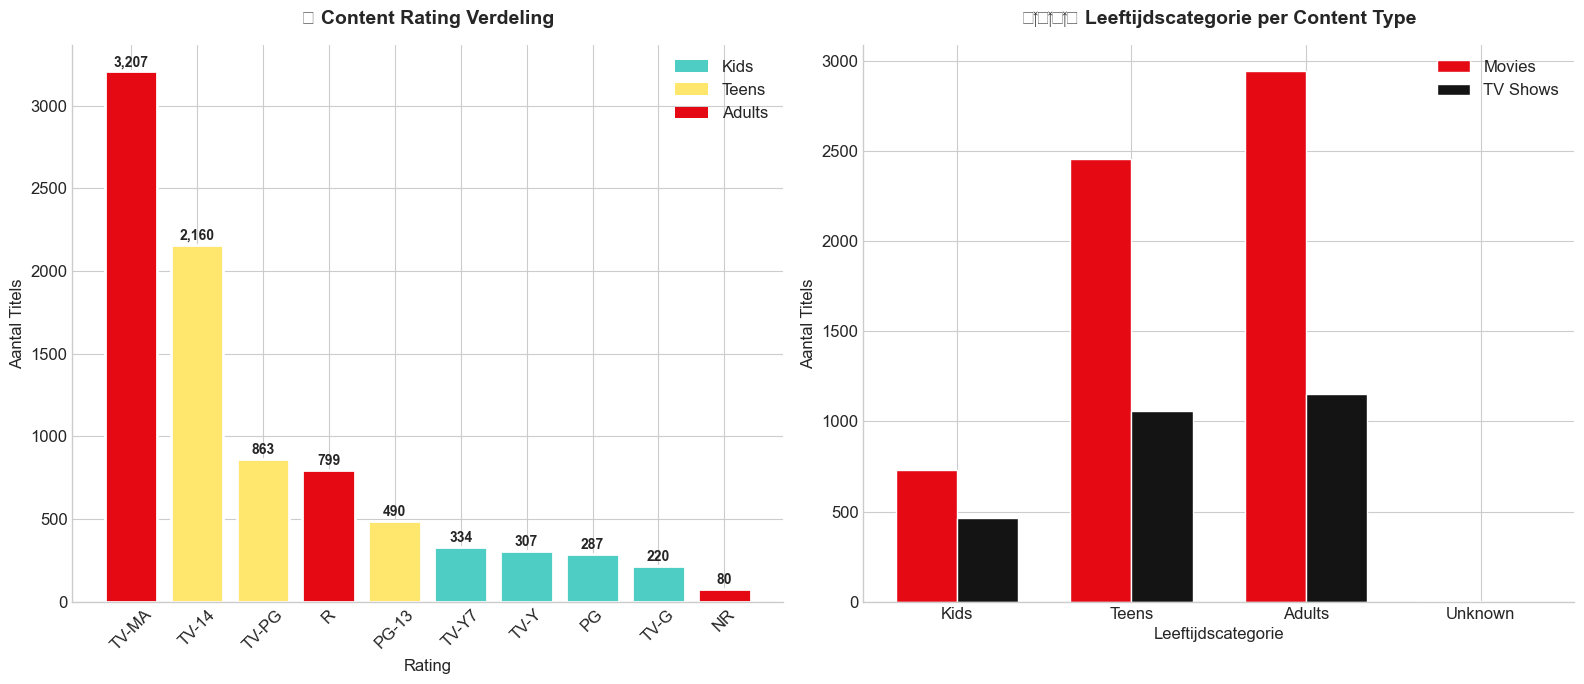


💡 KEY INSIGHTS: Content Ratings

🔞 Netflix is primair gericht op volwassenen: 46.5% Adult content
👶 Slechts 13.6% is specifiek voor kinderen

📺 TV-MA (Mature Audiences) is de meest voorkomende rating


In [20]:
# Rating analyse
rating_counts = df_clean['rating'].value_counts()

# Categoriseer ratings
rating_categories = {
    'Kids': ['TV-Y', 'TV-Y7', 'TV-Y7-FV', 'G', 'TV-G', 'PG'],
    'Teens': ['PG-13', 'TV-PG', 'TV-14'],
    'Adults': ['R', 'TV-MA', 'NC-17', 'NR', 'UR']
}

def categorize_rating(rating):
    for category, ratings in rating_categories.items():
        if rating in ratings:
            return category
    return 'Unknown'

df_clean['rating_category'] = df_clean['rating'].apply(categorize_rating)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# ===== Plot 1: Rating Distribution =====
ax1 = axes[0]
top_ratings = rating_counts.head(10)

# Color by category
rating_colors = []
for r in top_ratings.index:
    cat = categorize_rating(r)
    if cat == 'Kids':
        rating_colors.append('#4ECDC4')
    elif cat == 'Teens':
        rating_colors.append('#FFE66D')
    else:
        rating_colors.append(NETFLIX_RED)

bars = ax1.bar(top_ratings.index, top_ratings.values, color=rating_colors, edgecolor='white', linewidth=2)

for bar, count in zip(bars, top_ratings.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 30, f'{count:,}',
             ha='center', fontsize=10, fontweight='bold')

ax1.set_xlabel('Rating', fontsize=12)
ax1.set_ylabel('Aantal Titels', fontsize=12)
ax1.set_title('📊 Content Rating Verdeling', fontsize=14, fontweight='bold', pad=15)
ax1.tick_params(axis='x', rotation=45)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Legenda
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#4ECDC4', label='Kids'),
    Patch(facecolor='#FFE66D', label='Teens'),
    Patch(facecolor=NETFLIX_RED, label='Adults')
]
ax1.legend(handles=legend_elements, loc='upper right')

# ===== Plot 2: Rating Category by Content Type =====
ax2 = axes[1]
cat_by_type = df_clean.groupby(['rating_category', 'type']).size().unstack(fill_value=0)
cat_by_type = cat_by_type.reindex(['Kids', 'Teens', 'Adults', 'Unknown'])

x = np.arange(len(cat_by_type))
width = 0.35

bars1 = ax2.bar(x - width/2, cat_by_type['Movie'], width, label='Movies', color=NETFLIX_RED, edgecolor='white')
bars2 = ax2.bar(x + width/2, cat_by_type['TV Show'], width, label='TV Shows', color=NETFLIX_BLACK, edgecolor='white')

ax2.set_xlabel('Leeftijdscategorie', fontsize=12)
ax2.set_ylabel('Aantal Titels', fontsize=12)
ax2.set_title('👨‍👩‍👧‍👦 Leeftijdscategorie per Content Type', fontsize=14, fontweight='bold', pad=15)
ax2.set_xticks(x)
ax2.set_xticklabels(cat_by_type.index)
ax2.legend()
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('viz_07_rating_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

# Key insights
adults_pct = df_clean[df_clean['rating_category'] == 'Adults'].shape[0] / len(df_clean) * 100
kids_pct = df_clean[df_clean['rating_category'] == 'Kids'].shape[0] / len(df_clean) * 100

print("\n" + "="*70)
print("💡 KEY INSIGHTS: Content Ratings")
print("="*70)
print(f"\n🔞 Netflix is primair gericht op volwassenen: {adults_pct:.1f}% Adult content")
print(f"👶 Slechts {kids_pct:.1f}% is specifiek voor kinderen")
print(f"\n📺 TV-MA (Mature Audiences) is de meest voorkomende rating")

---
## 8. Duration Analysis: Kort vs Lang

**Verhaal:** *Hoe lang zijn Netflix films gemiddeld? En hoeveel seizoenen hebben TV Shows typisch?*

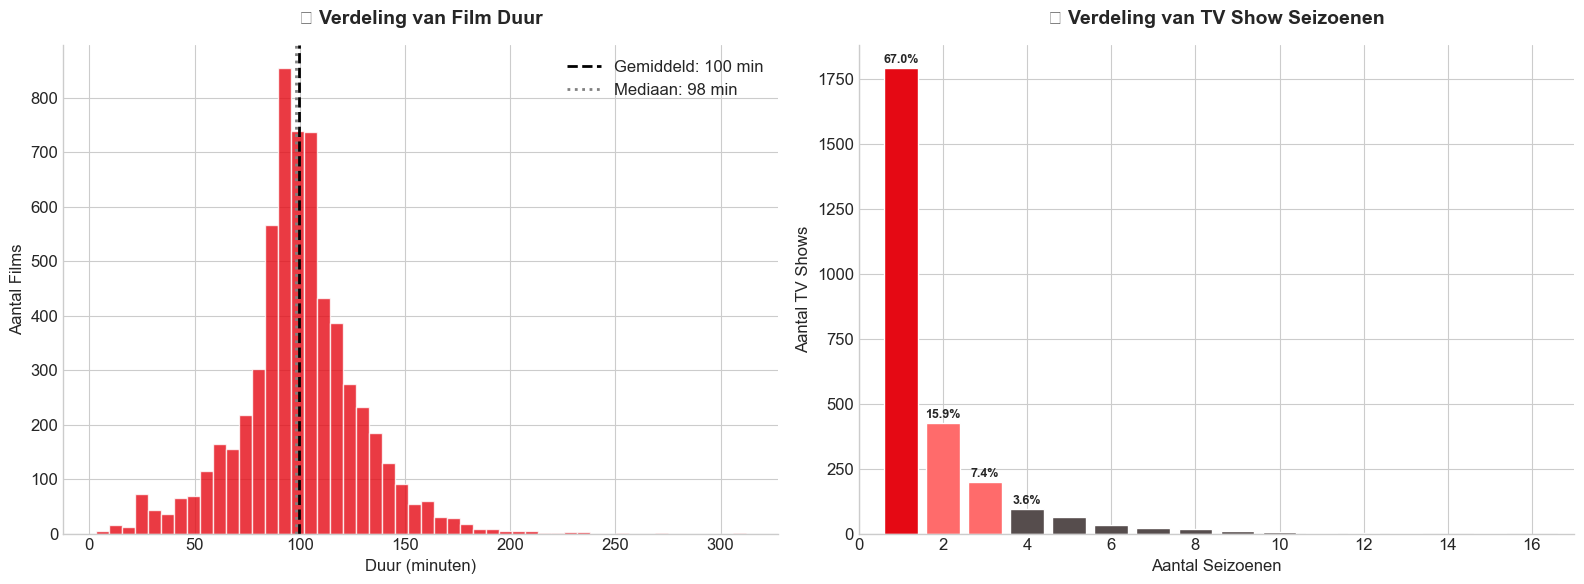


💡 KEY INSIGHTS: Duration Analysis

🎬 MOVIES:
   • Gemiddelde duur: 100 minuten
   • Kortste film: 3 minuten
   • Langste film: 312 minuten

📺 TV SHOWS:
   • 67.0% van TV Shows heeft slechts 1 seizoen
   • Gemiddeld aantal seizoenen: 1.8
   • Meeste seizoenen: 17


In [21]:
# Splits data voor movies en tv shows
movies = df_clean[df_clean['type'] == 'Movie'].copy()
tv_shows = df_clean[df_clean['type'] == 'TV Show'].copy()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ===== Plot 1: Movie Duration Distribution =====
ax1 = axes[0]
movie_duration = movies['duration_num'].dropna()

ax1.hist(movie_duration, bins=50, color=NETFLIX_RED, edgecolor='white', alpha=0.8)
ax1.axvline(movie_duration.mean(), color='black', linestyle='--', linewidth=2, label=f'Gemiddeld: {movie_duration.mean():.0f} min')
ax1.axvline(movie_duration.median(), color='gray', linestyle=':', linewidth=2, label=f'Mediaan: {movie_duration.median():.0f} min')

ax1.set_xlabel('Duur (minuten)', fontsize=12)
ax1.set_ylabel('Aantal Films', fontsize=12)
ax1.set_title('🎬 Verdeling van Film Duur', fontsize=14, fontweight='bold', pad=15)
ax1.legend()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# ===== Plot 2: TV Show Seasons Distribution =====
ax2 = axes[1]
tv_seasons = tv_shows['duration_num'].dropna()
season_counts = tv_seasons.value_counts().sort_index()

colors = [NETFLIX_RED if s == 1 else '#FF6B6B' if s <= 3 else NETFLIX_GRAY for s in season_counts.index]
bars = ax2.bar(season_counts.index, season_counts.values, color=colors, edgecolor='white')

# Voeg percentages toe
total_tv = len(tv_seasons)
for bar, count in zip(bars, season_counts.values):
    pct = count / total_tv * 100
    if pct > 3:
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20, f'{pct:.1f}%',
                 ha='center', fontsize=9, fontweight='bold')

ax2.set_xlabel('Aantal Seizoenen', fontsize=12)
ax2.set_ylabel('Aantal TV Shows', fontsize=12)
ax2.set_title('📺 Verdeling van TV Show Seizoenen', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlim(0, 17)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('viz_08_duration_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

# Key insights
one_season_pct = season_counts[1] / total_tv * 100 if 1 in season_counts else 0

print("\n" + "="*70)
print("💡 KEY INSIGHTS: Duration Analysis")
print("="*70)
print(f"\n🎬 MOVIES:")
print(f"   • Gemiddelde duur: {movie_duration.mean():.0f} minuten")
print(f"   • Kortste film: {movie_duration.min():.0f} minuten")
print(f"   • Langste film: {movie_duration.max():.0f} minuten")
print(f"\n📺 TV SHOWS:")
print(f"   • {one_season_pct:.1f}% van TV Shows heeft slechts 1 seizoen")
print(f"   • Gemiddeld aantal seizoenen: {tv_seasons.mean():.1f}")
print(f"   • Meeste seizoenen: {tv_seasons.max():.0f}")

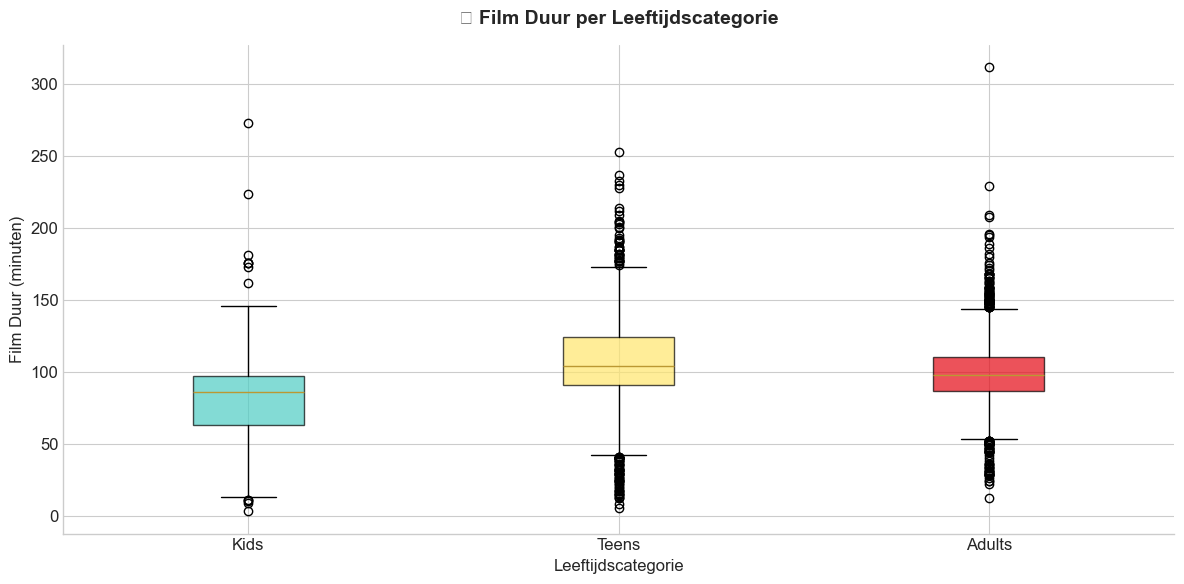


💡 Kids films zijn over het algemeen korter dan films voor volwassenen!


In [22]:
# Box plot vergelijking van movie durations per rating category
fig, ax = plt.subplots(figsize=(12, 6))

movies_with_rating = movies[movies['rating_category'].isin(['Kids', 'Teens', 'Adults'])]

colors_box = {'Kids': '#4ECDC4', 'Teens': '#FFE66D', 'Adults': NETFLIX_RED}
order = ['Kids', 'Teens', 'Adults']

bp = ax.boxplot([movies_with_rating[movies_with_rating['rating_category'] == cat]['duration_num'].dropna() 
                 for cat in order],
                labels=order, patch_artist=True)

for patch, color in zip(bp['boxes'], [colors_box[cat] for cat in order]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_xlabel('Leeftijdscategorie', fontsize=12)
ax.set_ylabel('Film Duur (minuten)', fontsize=12)
ax.set_title('📊 Film Duur per Leeftijdscategorie', fontsize=14, fontweight='bold', pad=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('viz_09_duration_by_rating.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\n💡 Kids films zijn over het algemeen korter dan films voor volwassenen!")

---
## 9. Top Creators: De Makers Achter Netflix

**Verhaal:** *Welke regisseurs en acteurs domineren Netflix? En is er overlap tussen Movies en TV Shows?*

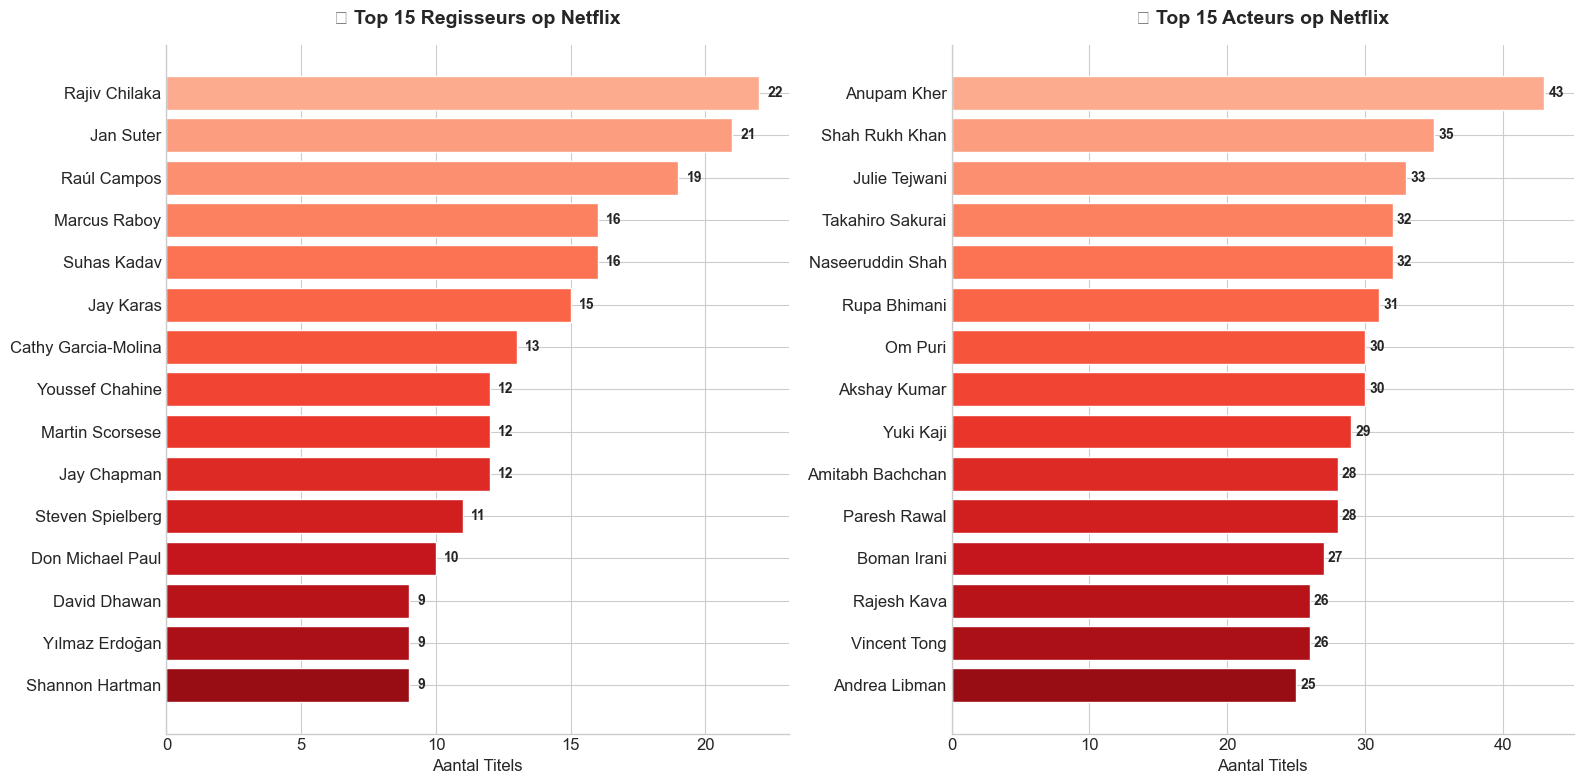


💡 KEY INSIGHTS: Top Creators

🎬 Top regisseur: Rajiv Chilaka met 22 titels
⭐ Top acteur: Anupam Kher met 43 titels

📊 Totaal unieke regisseurs: 4,993
📊 Totaal unieke acteurs: 36,439


In [23]:
# Top Directors
directors = df_clean['director'].dropna()

# Explode multi-director entries
all_directors = []
for d in directors:
    for name in d.split(', '):
        all_directors.append(name.strip())

director_counts = pd.Series(all_directors).value_counts().head(15)

# Top Cast Members
cast = df_clean['cast'].dropna()

all_cast = []
for c in cast:
    for name in c.split(', '):
        all_cast.append(name.strip())

cast_counts = pd.Series(all_cast).value_counts().head(15)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# ===== Plot 1: Top Directors =====
ax1 = axes[0]
colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(director_counts)))[::-1]
bars = ax1.barh(director_counts.index[::-1], director_counts.values[::-1], color=colors, edgecolor='white')

for bar, count in zip(bars, director_counts.values[::-1]):
    ax1.text(count + 0.3, bar.get_y() + bar.get_height()/2, f'{count}',
             va='center', fontsize=10, fontweight='bold')

ax1.set_xlabel('Aantal Titels', fontsize=12)
ax1.set_title('🎬 Top 15 Regisseurs op Netflix', fontsize=14, fontweight='bold', pad=15)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# ===== Plot 2: Top Cast =====
ax2 = axes[1]
colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(cast_counts)))[::-1]
bars = ax2.barh(cast_counts.index[::-1], cast_counts.values[::-1], color=colors, edgecolor='white')

for bar, count in zip(bars, cast_counts.values[::-1]):
    ax2.text(count + 0.3, bar.get_y() + bar.get_height()/2, f'{count}',
             va='center', fontsize=10, fontweight='bold')

ax2.set_xlabel('Aantal Titels', fontsize=12)
ax2.set_title('⭐ Top 15 Acteurs op Netflix', fontsize=14, fontweight='bold', pad=15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('viz_10_top_creators.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\n" + "="*70)
print("💡 KEY INSIGHTS: Top Creators")
print("="*70)
print(f"\n🎬 Top regisseur: {director_counts.index[0]} met {director_counts.values[0]} titels")
print(f"⭐ Top acteur: {cast_counts.index[0]} met {cast_counts.values[0]} titels")
print(f"\n📊 Totaal unieke regisseurs: {len(set(all_directors)):,}")
print(f"📊 Totaal unieke acteurs: {len(set(all_cast)):,}")

---
## 10. Word Cloud: Thema's in Netflix Content

**Verhaal:** *Wat zijn de meest voorkomende woorden in Netflix content beschrijvingen? Dit geeft ons inzicht in de thema's en verhaallijnen die Netflix verkiest.*

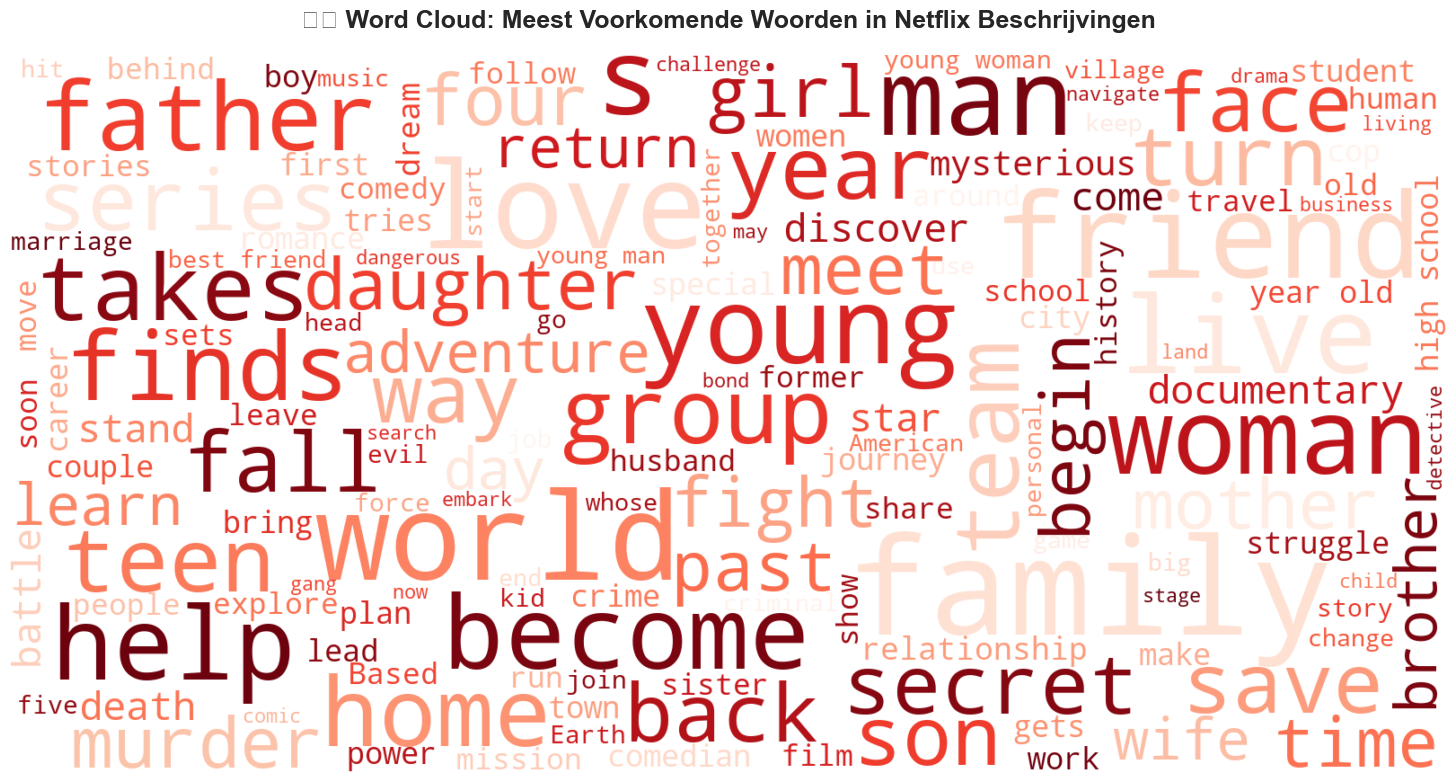


💡 De word cloud laat zien welke thema's en woorden het meest voorkomen in Netflix content beschrijvingen.


In [24]:
# Combine all descriptions
text = ' '.join(df_clean['description'].dropna().astype(str))

# Custom stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['one', 'two', 'three', 'new', 'find', 'must', 'life', 'will', 'set', 'take', 'makes'])

# Create word cloud
wordcloud = WordCloud(
    width=1600, 
    height=800,
    background_color='white',
    colormap='Reds',
    max_words=150,
    stopwords=custom_stopwords,
    min_font_size=10,
    max_font_size=150
).generate(text)

fig, ax = plt.subplots(figsize=(16, 8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title('☁️ Word Cloud: Meest Voorkomende Woorden in Netflix Beschrijvingen', 
             fontsize=18, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('viz_11_wordcloud.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\n💡 De word cloud laat zien welke thema's en woorden het meest voorkomen in Netflix content beschrijvingen.")

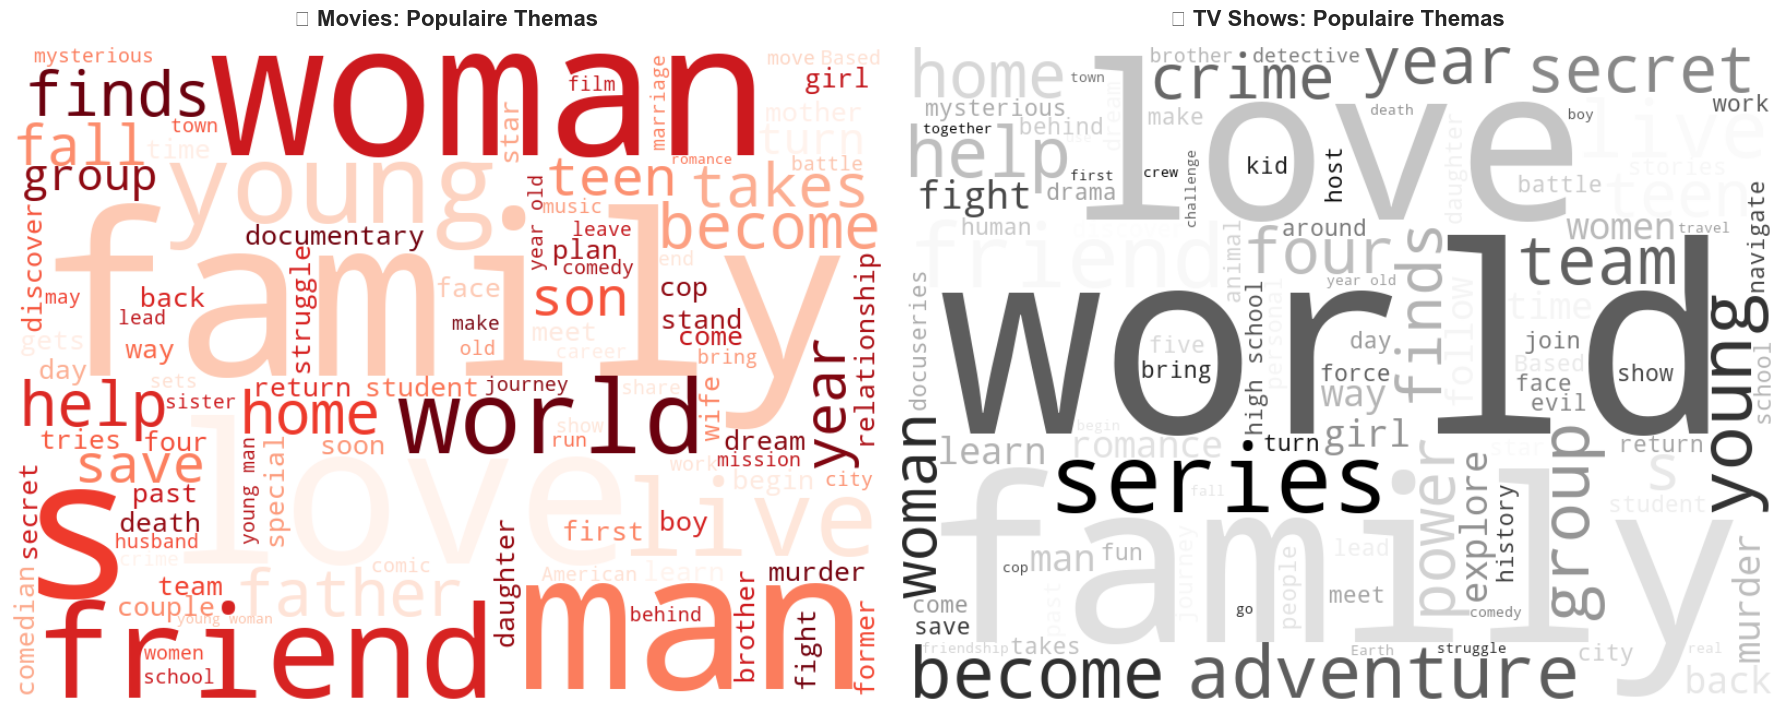

In [25]:
# Word clouds voor Movies vs TV Shows
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Movie word cloud
movie_text = ' '.join(movies['description'].dropna().astype(str))
movie_wc = WordCloud(
    width=800, height=600, background_color='white',
    colormap='Reds', max_words=100, stopwords=custom_stopwords
).generate(movie_text)

axes[0].imshow(movie_wc, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('🎬 Movies: Populaire Themas', fontsize=16, fontweight='bold', pad=15)

# TV Show word cloud
tv_text = ' '.join(tv_shows['description'].dropna().astype(str))
tv_wc = WordCloud(
    width=800, height=600, background_color='white',
    colormap='Greys', max_words=100, stopwords=custom_stopwords
).generate(tv_text)

axes[1].imshow(tv_wc, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('📺 TV Shows: Populaire Themas', fontsize=16, fontweight='bold', pad=15)

plt.tight_layout()
plt.savefig('viz_12_wordcloud_comparison.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

---
## 11. Conclusies & Key Insights

### Het Verhaal van Netflix in Data

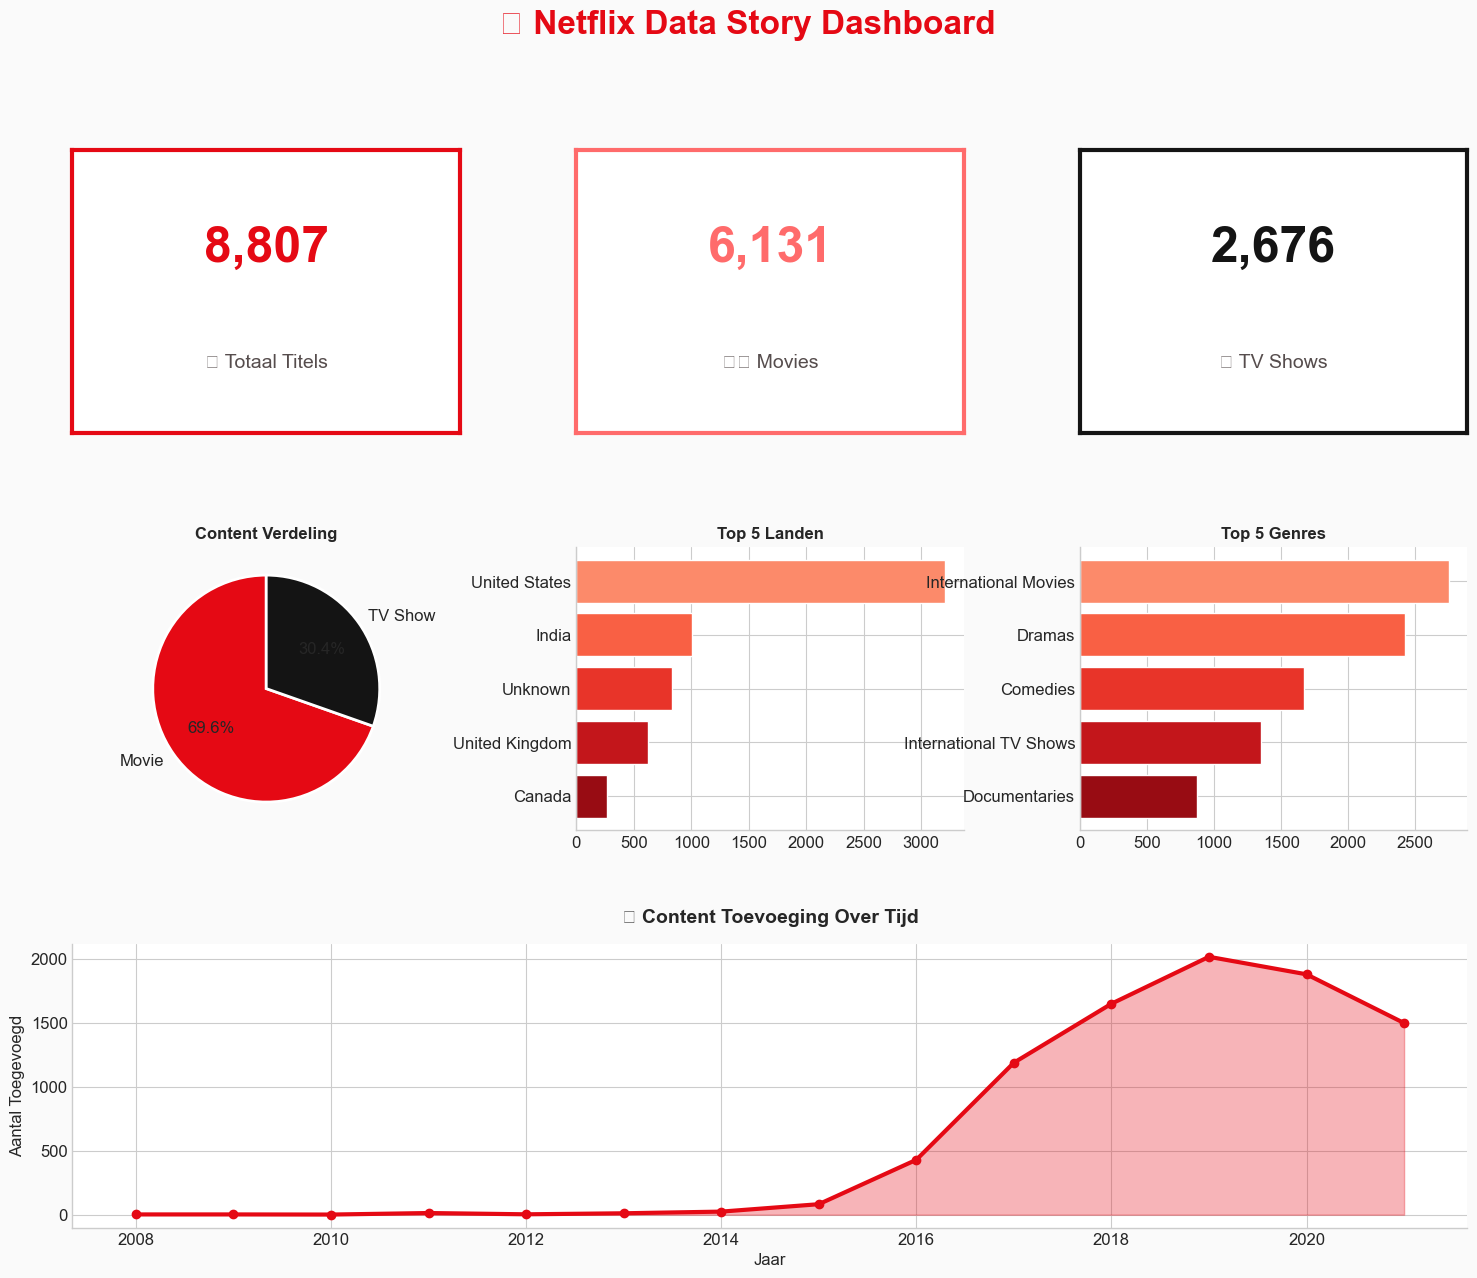

In [26]:
# Summary Dashboard
fig = plt.figure(figsize=(18, 14))

# Create grid
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3)

# Kleuren
bg_color = '#FAFAFA'
fig.patch.set_facecolor(bg_color)

# ===== KPI Cards (Top Row) =====
kpi_data = [
    ('🎬 Totaal Titels', f"{len(df_clean):,}", NETFLIX_RED),
    ('📽️ Movies', f"{len(movies):,}", '#FF6B6B'),
    ('📺 TV Shows', f"{len(tv_shows):,}", NETFLIX_BLACK),
]

for i, (label, value, color) in enumerate(kpi_data):
    ax = fig.add_subplot(gs[0, i])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.text(0.5, 0.65, value, fontsize=36, fontweight='bold', ha='center', va='center', color=color)
    ax.text(0.5, 0.25, label, fontsize=14, ha='center', va='center', color=NETFLIX_GRAY)
    ax.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    # Border
    for spine in ax.spines.values():
        spine.set_edgecolor(color)
        spine.set_linewidth(3)
        spine.set_visible(True)

# ===== Mini Pie Chart =====
ax_pie = fig.add_subplot(gs[1, 0])
type_counts = df_clean['type'].value_counts()
ax_pie.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%',
           colors=[NETFLIX_RED, NETFLIX_BLACK], startangle=90,
           wedgeprops=dict(edgecolor='white', linewidth=2))
ax_pie.set_title('Content Verdeling', fontsize=12, fontweight='bold')

# ===== Top 5 Countries =====
ax_countries = fig.add_subplot(gs[1, 1])
top5_countries = df_clean['primary_country'].value_counts().head(5)
colors = plt.cm.Reds(np.linspace(0.4, 0.9, 5))[::-1]
ax_countries.barh(top5_countries.index[::-1], top5_countries.values[::-1], color=colors, edgecolor='white')
ax_countries.set_title('Top 5 Landen', fontsize=12, fontweight='bold')
ax_countries.spines['top'].set_visible(False)
ax_countries.spines['right'].set_visible(False)

# ===== Top 5 Genres =====
ax_genres = fig.add_subplot(gs[1, 2])
top5_genres = genre_df['genre'].value_counts().head(5)
ax_genres.barh(top5_genres.index[::-1], top5_genres.values[::-1], color=colors, edgecolor='white')
ax_genres.set_title('Top 5 Genres', fontsize=12, fontweight='bold')
ax_genres.spines['top'].set_visible(False)
ax_genres.spines['right'].set_visible(False)

# ===== Timeline (Bottom - Full Width) =====
ax_timeline = fig.add_subplot(gs[2, :])
ax_timeline.fill_between(yearly_content.index, yearly_content['Total'], alpha=0.3, color=NETFLIX_RED)
ax_timeline.plot(yearly_content.index, yearly_content['Total'], color=NETFLIX_RED, linewidth=3, marker='o')
ax_timeline.set_xlabel('Jaar', fontsize=12)
ax_timeline.set_ylabel('Aantal Toegevoegd', fontsize=12)
ax_timeline.set_title('📈 Content Toevoeging Over Tijd', fontsize=14, fontweight='bold', pad=15)
ax_timeline.spines['top'].set_visible(False)
ax_timeline.spines['right'].set_visible(False)

plt.suptitle('🎬 Netflix Data Story Dashboard', fontsize=24, fontweight='bold', y=0.98, color=NETFLIX_RED)

plt.savefig('viz_13_dashboard.png', dpi=150, bbox_inches='tight', facecolor=bg_color)
plt.show()

In [27]:
# Final Summary
print("\n" + "="*80)
print("🎬 NETFLIX DATA STORY: SAMENVATTING & CONCLUSIES")
print("="*80)

print("\n📊 DATASET OVERZICHT")
print("-"*40)
print(f"   • Totaal aantal titels: {len(df_clean):,}")
print(f"   • Movies: {len(movies):,} ({len(movies)/len(df_clean)*100:.1f}%)")
print(f"   • TV Shows: {len(tv_shows):,} ({len(tv_shows)/len(df_clean)*100:.1f}%)")

print("\n🌍 GEOGRAFISCHE SPREIDING")
print("-"*40)
print(f"   • Content uit {df_clean['primary_country'].nunique()} landen")
print(f"   • Top 3: VS ({top_countries['United States']:,}), India ({top_countries['India']:,}), UK ({top_countries['United Kingdom']:,})")
print(f"   • Internationale content groeit: van ~50% naar 60%+")

print("\n📈 GROEITRENDS")
print("-"*40)
print(f"   • Piekjaar: {int(peak_year)} met {int(peak_value):,} nieuwe titels")
print(f"   • Explosieve groei tussen 2016-2019")
print(f"   • TV Shows groei sneller dan Movies")

print("\n🎭 CONTENT KARAKTERISTIEKEN")
print("-"*40)
print(f"   • Top genre: {top_genres.index[0]}")
print(f"   • Gemiddelde film duur: {movie_duration.mean():.0f} minuten")
print(f"   • {one_season_pct:.0f}% TV Shows heeft slechts 1 seizoen")
print(f"   • Primair Adult content (TV-MA meest voorkomend)")

print("\n💡 KEY INSIGHTS VOOR STORYTELLING")
print("-"*40)
print("   1. Netflix is verschoven van puur Amerikaanse content naar globaal")
print("   2. TV Shows worden steeds belangrijker (binge-watching cultuur)")
print("   3. Internationale Drama's en Comedies domineren de catalogus")
print("   4. Netflix richt zich primair op volwassen publiek")
print("   5. Korte series (1 seizoen) zijn de norm - test-and-see strategie")

print("\n" + "="*80)
print("📁 GEGENEREERDE VISUALISATIES")
print("="*80)
visualizations = [
    'viz_01_missing_values.png',
    'viz_02_content_distribution.png',
    'viz_03_timeline_growth.png',
    'viz_04_geographical_distribution.png',
    'viz_05_international_growth.png',
    'viz_06_genre_analysis.png',
    'viz_07_rating_analysis.png',
    'viz_08_duration_analysis.png',
    'viz_09_duration_by_rating.png',
    'viz_10_top_creators.png',
    'viz_11_wordcloud.png',
    'viz_12_wordcloud_comparison.png',
    'viz_13_dashboard.png'
]
for v in visualizations:
    print(f"   ✅ {v}")


🎬 NETFLIX DATA STORY: SAMENVATTING & CONCLUSIES

📊 DATASET OVERZICHT
----------------------------------------
   • Totaal aantal titels: 8,807
   • Movies: 6,131 (69.6%)
   • TV Shows: 2,676 (30.4%)

🌍 GEOGRAFISCHE SPREIDING
----------------------------------------
   • Content uit 90 landen
   • Top 3: VS (3,210), India (1,008), UK (626)
   • Internationale content groeit: van ~50% naar 60%+

📈 GROEITRENDS
----------------------------------------
   • Piekjaar: 2019 met 2,016 nieuwe titels
   • Explosieve groei tussen 2016-2019
   • TV Shows groei sneller dan Movies

🎭 CONTENT KARAKTERISTIEKEN
----------------------------------------
   • Top genre: International Movies
   • Gemiddelde film duur: 100 minuten
   • 67% TV Shows heeft slechts 1 seizoen
   • Primair Adult content (TV-MA meest voorkomend)

💡 KEY INSIGHTS VOOR STORYTELLING
----------------------------------------
   1. Netflix is verschoven van puur Amerikaanse content naar globaal
   2. TV Shows worden steeds belangrijker

In [28]:
# Save cleaned data voor modeling
df_clean.to_csv('netflix_cleaned.csv', index=False)
print("\n✅ Gecleande dataset opgeslagen als 'netflix_cleaned.csv'")
print("\n🚀 Klaar voor de volgende stap: Model Development!")


✅ Gecleande dataset opgeslagen als 'netflix_cleaned.csv'

🚀 Klaar voor de volgende stap: Model Development!
